
# Coursera Machine Learning : Applied Data Science Capstone  Week 4 & 5

### Clustering Neighborhoods in both <a href="#item1">New York</a>   and <a href="#item1">Toronto</a>  cities

## <div align="center">Introduction</div>

#### <div align="center"> A.1. Description & Disscusion of the Background</div>

<p style="text-align:justify;"> As a data scientist in a consulting company, I support companies in **decision-making** through the processing, exploitation, modeling and visualization of data to **respond as best as possible to the different business needs and above all optimally**. It was in this context that one day I was assigned to the R&D department of a large fast food brand XYZ to provide them with my expertise.
The latter wishes to increase its market share and expand its business through a short and medium term investment plan in different countries. To do so, it aims
at first, certain financial capitals more precisely New York and Toronto on their territory. She wishes to know in simple terms:</p>
        
- the potential of each financial capital in terms of attractiveness and profitability, ie where is it preferable to invest first?
- the business potential in each financial capital, that is to say, to answer the question: what type of business in which place and in which place?
- In other words, is it better to open a restaurant, pizzeria, fast food or bar in the Bronx rather than in Brooklyn or in Queens
At New York ? And, if yes the restaurant is **more profitable  in the Bronx than the others then which type of restaurant will be optimally more profitable :**
an Indian restaurant? a Mexican restaurant? a Chinese restaurant? or African restaurant?


<p style="text-align:justify;"> As you can imagine this choice is crucial and decisive if not vital for investors who before embarking on this new
challenge would like to be reassured through a data analysis and ensure a good ROI or Return On Investments but also and above all to establish themselves well and
be closer to customers. If today major brands of telephony, cars or web giants GAFAM or even the cloud like AWS have been able to impose themselves on
respective markets it is undoubtedly not for nothing: they knew how to put the product which it is necessary, at the place which it is necessary for the customers which it is necessary and at the best attractive prices.</p>

<p style="text-align:justify;"> Among the multitude of projects, I preferred to expose this one because it is a very stumilant exercise where it is necessary to show analysis, rigor and
especially of a very precise methodology. In addition, it is a case study of a real problem of decision-making aid and market research that faces today in the digital age any business.
eager to set up a solid marketing strategy or policy to stand out from its competitors.</p>

<p style="text-align:justify;"> More particularly, this project deals with a precise model of data science which is the segmentation or clustering of the cities of New York and Toronto. This is indeed,
to define, characterize and group in clusters the location of the most important businesses in all the different Neighborhoods and Boroughs of these 2 cities.
This work goes of course through the use of many tools both for data collection, cleaning, visualization and for the constitution and analysis of clusters for example :</p>

- <a href="#item1">Beautifulsoup</a>  Python package to scrape websites and parse HTML code.
- python library  <a href="#item1">geocoder</a>   to explore a geographical location,
- <a href="#item1">Foursquare API</a>  to explore neighborhoods in New York and Toronto cities,  get the most common venue categories in each neighborhood
- <a href="#item1">k-means clustering</a> for neighborhood segmentation .
- visualization library, <a href="#item1">Folium</a>, to visualize the results.


Now that the problem is posed as well as the objectives, we move on to the description of the data.





#### <div align="center"> A.2. Data description </div>
To carry out this project, I collected data from different sources by following these steps :

1. To collect the data and have the Neighborhoods of all the Boroughs of Toronto, I started by web scraping from the site : https://en.wikipedia.org/wiki/List_of_postal_codes_of_Toronto:_M

    Once the collection is finished, to have the geographic coordinates of each Neighborhood I merged this data with that of this site https://cocl.us/Geospatial_data/Geospatial_Coordinates.csv
2. New York data was collected directly at: this link https://cocl.us/new_york_dataset/newyork_data.json
3. For those 2 cities, I aggregate the 2 data set in one final dataframe and store it in my github which is update and can be directly download for the rest of this
   project on: https://github.com/iamadouhassane/-Coursera_ML_Capstone_week_4/blob/master/NewYork_and_Toronto_Neighborhoods.csv
   
   The final dataframe feature's are: 
           City            : City can only be Toronto or New York for distinguish
           Borough         : Borough of the city 
	       Neighborhood    : Neighborhood in Borough of the city 
           Latitude        : Latitude of Neighborhood
           Longitude       : Longitude of Neighborhood
           Postal Code     : Postal Code  of Neighborhood but this in not important for this project

 NB : Those 3 points are describe on :

 https://github.com/iamadouhassane/-Coursera_ML_Capstone_week_4/blob/master/NewYork_and_Canada_data_preprocessing.ipynb
 
4. After this,I used Forsquare API to get the most common venues of given Neighborhoods in Toronto and New York 

All the results of this project **:** plot, file or  data set as I said will be available on my github account. Progressively,
I will indicates where are their repertories . 
it is the end of this section which leads us to the part of the methodology


### Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download and Explore Dataset of New york's and Toronto's cities with their geographical coordinates </a>

2. <a href="#item2">Explore Neighborhoods in New york's and Toronto's Cities</a>

3. <a href="#item3">Analyze Each Neighborhood</a>

4. <a href="#item4">Cluster Neighborhoods</a>

5. <a href="#item5">Examine Clusters</a>    
</font>
</div>

### Import necessary Libraries
##### Attention: geocoder  and Folium installation takes few minutes

In [43]:
import numpy as np 
import pandas as pd 
import bs4 as bs
import requests
import urllib.request
#!conda install -c conda-forge geocoder --yes # install geocoder packages 
import geocoder
import matplotlib.pyplot as plt # plotting library
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline 
from sklearn.cluster import KMeans 
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
#!conda install -c conda-forge folium=0.5.0 --yes
import folium
import plotnine as p9
from plotnine import coord_flip,theme_classic, position_dodge,lims, ggplot, aes, theme, element_text, geom_line, geom_point, geom_bar, ggtitle, geom_text,scale_x_discrete, xlab,ylab, xlim, ylim, geom_hline

print('Folium and geocoder installed')
print('Libraries imported.')

Folium and geocoder installed
Libraries imported.


## <div align="center"> Methodology  </div>

### 1. Download and Explore Dataset of New york's and Toronto's cities with their geographical coordinates 


**Please noticed that if you want to see all steps of data preprocessing : scraping, cleaning, merge and aggregate both New york and Toronto data neighborhood you have 2 options:**

- 1st option ==>  go to : 
https://github.com/iamadouhassane/-Coursera_ML_Capstone_week_4/blob/master/NewYork_and_Canada_data_preprocessing.ipynb


- 2nd option ==> see directly csv file which is the final result of the 1st option: https://github.com/iamadouhassane/-Coursera_ML_Capstone_week_4/blob/master/NewYork_and_Toronto_Neighborhoods.csv

In [3]:
#pd.read_csv('https://github.com/iamadouhassane/-Coursera_ML_Capstone_week_4/blob/master/NewYork_and_Toronto_Neighborhoods.csv',error_bad_lines=False)

In [4]:
data_all_cities = pd.read_csv("C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/NewYork_and_Toronto_Neighborhoods.csv")
data_all_cities.head()
print("#"*70)
print('            New York city has {} boroughs and {} neighborhoods'.format(len(data_all_cities[data_all_cities.City=="New York"]['Borough'].unique()),data_all_cities[data_all_cities.City=="New York"].shape[0]))
print('            Toronto  city has {} boroughs and {} neighborhoods'.format(len(data_all_cities[data_all_cities.City!="New York"]['Borough'].unique()),data_all_cities[data_all_cities.City!="New York"].shape[0]))

print("#"*70)
print("\n")
print("#"*70)
print("                     View somes rows of New york city")
print("#"*70)
print(data_all_cities[data_all_cities.City=="New York"].head(2).reset_index(drop=True))
print("\n")
print("#"*70)
print("                     View somes rows of Toronto city")
print("#"*70)
print(data_all_cities[data_all_cities.City!="New York"].head(2).reset_index(drop=True))
print("#"*70)


######################################################################
            New York city has 5 boroughs and 306 neighborhoods
            Toronto  city has 10 boroughs and 103 neighborhoods
######################################################################


######################################################################
                     View somes rows of New york city
######################################################################
  Borough      City   Latitude  Longitude Neighborhood Postal Code
0   Bronx  New York  40.894705 -73.847201    Wakefield         XXX
1   Bronx  New York  40.874294 -73.829939   Co-op City         XXX


######################################################################
                     View somes rows of Toronto city
######################################################################
      Borough     City   Latitude  Longitude      Neighborhood Postal Code
0  North York  Toronto  43.753259 -79.329656         Parkwoo

#### Use python package  <a href="#item1">folium</a> to create map of those cities with neighborhoods 

#### Create function to automate the foluim map and  use geopy library to get the latitude and longitude values of  address .

In [5]:
def foluim_maps_plot(address,data, map_name_output):
    """
     This function create foluim map with specifics adress and add markers to the map
    """
    
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of the adress: {} are {}, {}.'.format(address, latitude, longitude))
    map_plot = folium.Map(location=[latitude, longitude], zoom_start=10)
    # add markers to map
    for lat, lng, borough, neighborhood, color_map in zip(data['Latitude'], data['Longitude'], data['Borough'], data['Neighborhood'],data['color_map']):
        label = '{}, {}'.format(neighborhood, borough)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker([lat, lng],radius=5,popup=label,color=color_map,fill=True,fill_color=color_map,fill_opacity=0.7,parse_html=False).add_to(map_plot)  
        map_plot.save('C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/'+map_name_output+'.html')
    return(map_plot)


In [6]:
# create map for city with different color 
data_all_cities["color_map"]="blue"
data_all_cities.loc[data_all_cities.City=="New York", "color_map"] ="Red"
New_york_map = foluim_maps_plot('New York City, NY',data_all_cities[data_all_cities.City=="New York"].reset_index(drop=True), "New_york_foluim")
Toronto_map = foluim_maps_plot('Toronto, CA',data_all_cities[data_all_cities.City!="New York"].reset_index(drop=True), "Toronto_foluim")
#New_york_and_Toronto_map = foluim_maps_plot('New York City, NY',data_all_cities, "New_york_and_Toronto_foluim")


The geograpical coordinate of the adress: New York City, NY are 40.7127281, -74.0060152.
The geograpical coordinate of the adress: Toronto, CA are 43.6534817, -79.3839347.


In [7]:
# see new york maps
New_york_map

In [8]:
# see Toronto maps
Toronto_map

![30% center](information_NY_map.PNG)
![30% center](information_TO_map.PNG)


### 2. Explore Neighborhoods in New york's and Toronto's Cities by using Foursquare API

In [9]:
#### Define Foursquare Credentials and Version
#### PLease Enter your CLIENT_ID and CLIENT_SECRET of Foursquare account
CLIENT_ID = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 500
LIMIT= 100


In [10]:
def getNearbyVenues(city, names, latitudes, longitudes, radius=500):
    venues_list=[]
    for city, name, lat, lng in zip(city, names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(city, name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'],  v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City','Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    return(nearby_venues)

##### Let's apply the function to explore the venue in both the 2 cities

In [11]:
data_all_cities_venues = getNearbyVenues(city=data_all_cities["City"], names=data_all_cities['Neighborhood'],latitudes=data_all_cities['Latitude'],longitudes=data_all_cities['Longitude'])
#data_all_cities_venues.to_csv("C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/data_all_cities_venues.csv")

##### Let's check how many venues were returned for each neighborhood and how many unique categories can be curated from all the returned venues

In [12]:
print("#"*80)
print('                    {} venues were returned by Foursquare API.'.format(data_all_cities_venues.shape[0]))
print("#"*80)
print("\n")
print("#"*80)
print('There are in total {} uniques categories: {} for New York and  {} for Toronto '.format(len(data_all_cities_venues['Venue Category'].unique()),len(data_all_cities_venues[data_all_cities_venues.City=="New York"]['Venue Category'].unique()), len(data_all_cities_venues[data_all_cities_venues.City!="New York"]['Venue Category'].unique())))
print("#"*80)
#print("\n")
print("                    number of venues for each Neighborhood  ")
print("#"*80)
print(data_all_cities_venues.groupby(by =['Neighborhood',"City"])["Venue Category"].count().reset_index().rename(columns={"Venue Category":"number of venues"}).sort_values("number of venues").reset_index(drop=True))
print("#"*120)
#print("\n")
print("                    data_all_cities_venues head   ")
print("#"*120)
data_all_cities_venues.head()

################################################################################
                    12037 venues were returned by Foursquare API.
################################################################################


################################################################################
There are in total 461 uniques categories: 425 for New York and  275 for Toronto 
################################################################################
                    number of venues for each Neighborhood  
################################################################################
                                          Neighborhood      City  \
0                             York Mills, Silver Hills   Toronto   
1    West Deane Park, Princess Gardens, Martin Grov...   Toronto   
2                                            Todt Hill  New York   
3                                     Humberlea, Emery   Toronto   
4                                           

City Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  New York    Wakefield              40.894705              -73.847201   
1  New York    Wakefield              40.894705              -73.847201   
2  New York    Wakefield              40.894705              -73.847201   
3  New York    Wakefield              40.894705              -73.847201   
4  New York    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
2         Walgreens       40.896528       -73.844700        Pharmacy  
3          Rite Aid       40.896649       -73.844846        Pharmacy  
4           Dunkin'       40.890459       -73.849089      Donut Shop

###  3: Analyze Each Neighborhood

#### To  analyze Each Neighborhood , you start by spliting the results of Neighborhood by city  and  the reason is to apply one hot encoding on the *Venue Category*  variable for each city separatly. In this way , you make sure   you will not increase the number of columns in this process. 

Toronto data set one hot encoding

In [14]:
data_Toronto_venues = data_all_cities_venues[data_all_cities_venues.City=="Toronto"]
data_Toronto_onehot = pd.get_dummies(data_Toronto_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
data_Toronto_onehot['Neighborhood'] = data_Toronto_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [data_Toronto_onehot.columns[-1]] + list(data_Toronto_onehot.columns[:-1])
data_Toronto_onehot = data_Toronto_onehot[fixed_columns]
print('Toronto  one hot encoding new dataframe size are: {} '.format(data_Toronto_onehot.shape))
data_Toronto_onehot.head()
print("\n")

Toronto  one hot encoding new dataframe size are: (2130, 275) 




New York data set one hot encoding

In [15]:
data_NewYork_venues = data_all_cities_venues[data_all_cities_venues.City=="New York"]
data_NewYork_onehot = pd.get_dummies(data_NewYork_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
data_NewYork_onehot['Neighborhood'] = data_NewYork_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [data_NewYork_onehot.columns[-1]] + list(data_NewYork_onehot.columns[:-1])
data_NewYork_onehot = data_NewYork_onehot[fixed_columns]
print('New york one hot encoding new dataframe size are: {} '.format(data_NewYork_onehot.shape))
data_NewYork_onehot.head()
print("\n")

New york one hot encoding new dataframe size are: (9907, 425) 




#### Next, let's group rows by neighborhood by taking the mean of the frequency of occurrence of each category

In [16]:
data_Toronto_grouped = data_Toronto_onehot.groupby('Neighborhood').mean().reset_index()
print('Toronto dataframe size are: {} '.format(data_Toronto_grouped.shape))
print("\n")
data_NewYork_grouped = data_NewYork_onehot.groupby('Neighborhood').mean().reset_index()
print('New york dataframe size are: {} '.format(data_NewYork_grouped.shape))
print("\n")

Toronto dataframe size are: (96, 275) 


New york dataframe size are: (301, 425) 




#### Let's print each neighborhood along with the top 5 most common venues for the 2 cities

The top 5 most common venues for Toronto

In [17]:
num_top_venues = 5

for hood in data_Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = data_Toronto_grouped[data_Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                        venue  freq
0                      Lounge  0.25
1                Skating Rink  0.25
2   Latin American Restaurant  0.25
3              Breakfast Spot  0.25
4  Modern European Restaurant  0.00


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.22
1  Sandwich Place  0.11
2        Pharmacy  0.11
3             Gym  0.11
4     Coffee Shop  0.11


----Bathurst Manor, Wilson Heights, Downsview North----
                 venue  freq
0          Coffee Shop  0.10
1                 Bank  0.10
2          Bridal Shop  0.05
3                Diner  0.05
4  Fried Chicken Joint  0.05


----Bayview Village----
                 venue  freq
0   Chinese Restaurant  0.25
1                 Café  0.25
2                 Bank  0.25
3  Japanese Restaurant  0.25
4          Yoga Studio  0.00


----Bedford Park, Lawrence Manor East----
              venue  freq
0       Coffee Shop  0.08
1   Thai Restaurant  0.08
2  Sushi Restaurant  0.08
3        

4      Chinese Restaurant  0.05


----Northwest, West Humber - Clairville----
                 venue  freq
0            Drugstore  0.33
1  Rental Car Location  0.33
2                  Bar  0.33
3          Yoga Studio  0.00
4   Mexican Restaurant  0.00


----Northwood Park, York University----
                  venue  freq
0           Coffee Shop   0.2
1        Massage Studio   0.2
2                   Bar   0.2
3  Caribbean Restaurant   0.2
4    Miscellaneous Shop   0.2


----Old Mill South, King's Mill Park, Sunnylea, Humber Bay, Mimico NE, The Queensway East, Royal York South East, Kingsway Park South East----
                        venue  freq
0  Construction & Landscaping   0.5
1              Baseball Field   0.5
2                 Yoga Studio   0.0
3                 Men's Store   0.0
4  Modern European Restaurant   0.0


----Parkdale, Roncesvalles----
                venue  freq
0      Breakfast Spot  0.14
1           Gift Shop  0.14
2                 Bar  0.07
3             Dog Ru

The top 5 most common venues for New York

In [18]:
num_top_venues = 5

for hood in data_NewYork_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = data_NewYork_grouped[data_NewYork_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                venue  freq
0         Pizza Place  0.15
1         Supermarket  0.09
2       Deli / Bodega  0.06
3  Chinese Restaurant  0.06
4         Bus Station  0.06


----Annadale----
           venue  freq
0    Pizza Place  0.18
1   Dance Studio  0.09
2     Restaurant  0.09
3  Train Station  0.09
4         Bakery  0.09


----Arden Heights----
         venue  freq
0     Pharmacy   0.2
1  Coffee Shop   0.2
2     Bus Stop   0.2
3  Pizza Place   0.2
4       Lawyer   0.2


----Arlington----
                 venue  freq
0        Deli / Bodega  0.14
1          Coffee Shop  0.14
2             Bus Stop  0.14
3  American Restaurant  0.14
4         Intersection  0.14


----Arrochar----
                venue  freq
0            Bus Stop  0.20
1  Italian Restaurant  0.10
2       Deli / Bodega  0.10
3   Polish Restaurant  0.05
4      Sandwich Place  0.05


----Arverne----
             venue  freq
0        Surf Spot  0.22
1    Metro Station  0.11
2   Sandwich Place  0.11
3       D

            venue  freq
0     Bus Station  0.18
1  Baseball Field  0.12
2        Pharmacy  0.06
3     Pizza Place  0.06
4       Gift Shop  0.06


----Cobble Hill----
           venue  freq
0            Bar  0.04
1     Playground  0.04
2    Pizza Place  0.04
3  Deli / Bodega  0.04
4    Coffee Shop  0.04


----College Point----
                       venue  freq
0              Deli / Bodega  0.10
1           Asian Restaurant  0.08
2                Karaoke Bar  0.05
3  Latin American Restaurant  0.05
4                Pizza Place  0.05


----Concord----
           venue  freq
0  Deli / Bodega   0.1
1  Tattoo Parlor   0.1
2    Coffee Shop   0.1
3           Park   0.1
4  Train Station   0.1


----Concourse----
                venue  freq
0       Grocery Store  0.11
1         Bus Station  0.07
2  Chinese Restaurant  0.07
3              Bakery  0.07
4  Italian Restaurant  0.04


----Concourse Village----
                  venue  freq
0         Deli / Bodega  0.10
1           Bus Station  0.08


         venue  freq
0  Coffee Shop   0.2
1   Donut Shop   0.1
2   Restaurant   0.1
3     Pharmacy   0.1
4  Pizza Place   0.1


----High  Bridge----
                venue  freq
0            Pharmacy  0.16
1         Pizza Place  0.12
2  Spanish Restaurant  0.08
3                Food  0.04
4                Park  0.04


----Highland Park----
                 venue  freq
0        Grocery Store  0.17
1  Fried Chicken Joint  0.08
2          Pizza Place  0.08
3                 Park  0.08
4         Tennis Court  0.08


----Hillcrest----
                venue  freq
0          Donut Shop  0.11
1  Italian Restaurant  0.05
2       Grocery Store  0.05
3              Market  0.05
4   College Cafeteria  0.05


----Hollis----
                venue  freq
0                Park  0.15
1      Baseball Field  0.08
2    Asian Restaurant  0.08
3   Mobile Phone Shop  0.08
4  Chinese Restaurant  0.08


----Holliswood----
               venue  freq
0         Playground   0.2
1         Donut Shop   0.2
2        S

                venue  freq
0         Pizza Place  0.17
1       Deli / Bodega  0.10
2                Park  0.10
3                Bank  0.10
4  Chinese Restaurant  0.07


----Oakland Gardens----
                venue  freq
0   Korean Restaurant  0.14
1         Yoga Studio  0.07
2  Chinese Restaurant  0.07
3                Bank  0.07
4       Deli / Bodega  0.07


----Oakwood----
                   venue  freq
0                    Bar  0.33
1               Bus Stop  0.33
2                 Lawyer  0.33
3  Outdoors & Recreation  0.00
4    Peruvian Restaurant  0.00


----Ocean Hill----
                             venue  freq
0                    Deli / Bodega  0.14
1                Convenience Store  0.07
2                      Supermarket  0.07
3  Southern / Soul Food Restaurant  0.07
4                       Playground  0.07


----Ocean Parkway----
                  venue  freq
0          Liquor Store  0.09
1           Bus Station  0.05
2            Playground  0.05
3  Gym / Fitness Center

                  venue  freq
0  Caribbean Restaurant   0.1
1    Chinese Restaurant   0.1
2              Pharmacy   0.1
3           Supermarket   0.1
4           Bus Station   0.1


----Steinway----
                  venue  freq
0   Rental Car Location  0.14
1    Italian Restaurant  0.05
2  Gym / Fitness Center  0.05
3               Brewery  0.05
4                  Café  0.05


----Stuyvesant Town----
            venue  freq
0   Boat or Ferry  0.11
1      Playground  0.11
2            Park  0.11
3  Baseball Field  0.06
4             Bar  0.06


----Sunnyside----
                       venue  freq
0                Pizza Place  0.11
1                Coffee Shop  0.06
2         Chinese Restaurant  0.06
3  South American Restaurant  0.06
4         Italian Restaurant  0.04


----Sunnyside Gardens----
           venue  freq
0            Bar  0.06
1  Grocery Store  0.05
2    Pizza Place  0.04
3  Deli / Bodega  0.03
4    Coffee Shop  0.03


----Sunset Park----
                       venue  fre

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [20]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_Toronto_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_NewYork_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_Toronto_sorted['Neighborhood'] = data_Toronto_grouped['Neighborhood']
neighborhoods_venues_NewYork_sorted['Neighborhood'] = data_NewYork_grouped['Neighborhood']

for ind in np.arange(data_Toronto_grouped.shape[0]):
    neighborhoods_venues_Toronto_sorted.iloc[ind, 1:] = return_most_common_venues(data_Toronto_grouped.iloc[ind, :], num_top_venues)

for ind in np.arange(neighborhoods_venues_NewYork_sorted.shape[0]):
    neighborhoods_venues_NewYork_sorted.iloc[ind, 1:] = return_most_common_venues(data_NewYork_grouped.iloc[ind, :], num_top_venues)

    
#print(neighborhoods_venues_Toronto_sorted.head())
print('\n')
#print(neighborhoods_venues_NewYork_sorted.head(2))

###  III: Cluster Neighborhoods and maps them


Run *k*-means to cluster the neighborhood into k clusters.
First, let's determine a optimal number of clusters for the two cities

Let's start with Toronto clustering

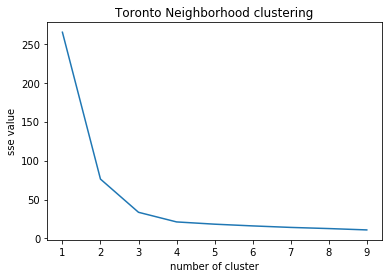

In [28]:
sse = {}
data_Toronto_grouped_without_Neighborhood = data_Toronto_grouped.drop('Neighborhood', 1)
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_Toronto_grouped_without_Neighborhood)
    data_Toronto_grouped['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("number of cluster")
plt.ylabel("sse value")
plt.title("Toronto Neighborhood clustering")
plt.show()


Now define New York clustering

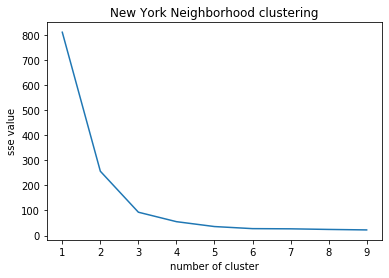

In [29]:
sse = {}
data_NewYork_grouped_without_Neighborhood = data_NewYork_grouped.drop('Neighborhood', 1)
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_NewYork_grouped_without_Neighborhood)
    data_NewYork_grouped['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.ylabel("sse value")
plt.title("New York Neighborhood clustering")
plt.xlabel("number of cluster")
plt.show()

With Elbow method as you see optimum number of clusters is 3 for both 2 cities( Realy, We have 3 clusters in Toronto's city and 4 in New York but for homogenity and business neededs we decide to fixe 3 clusters )

In [30]:
# set number of clusters
# run k-means clustering
# check cluster labels generated for each row in the dataframe
kclusters = 3
kmeans_Toronto = KMeans(n_clusters=kclusters, random_state=0).fit(data_Toronto_grouped_without_Neighborhood)
print(kmeans_Toronto.labels_[0:10]) 
kmeans_NewYork = KMeans(n_clusters=kclusters, random_state=0).fit(data_NewYork_grouped_without_Neighborhood)
print(kmeans_NewYork.labels_[0:10])


[1 1 1 1 1 1 1 1 1 1]
[2 2 2 0 1 2 0 0 0 2]


Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

Let's start with Totonto's city

In [31]:
# add clustering labels
neighborhoods_venues_Toronto_sorted.insert(0, 'Cluster Labels', kmeans_Toronto.labels_)
data_Toronto_merged = data_all_cities[data_all_cities.City!="New York"]
# merge Toronto_grouped with Toronto_data to add latitude/longitude for each neighborhood
data_Toronto_merged = data_Toronto_merged.join(neighborhoods_venues_Toronto_sorted.set_index('Neighborhood'), on='Neighborhood')
data_Toronto_merged.head(3) # check the last columns!

Borough     City   Latitude  Longitude  \
306        North York  Toronto  43.753259 -79.329656   
307        North York  Toronto  43.725882 -79.315572   
308  Downtown Toronto  Toronto  43.654260 -79.360636   

                  Neighborhood Postal Code color_map  Cluster Labels  \
306                  Parkwoods         M3A      blue             0.0   
307           Victoria Village         M4A      blue             1.0   
308  Regent Park, Harbourfront         M5A      blue             1.0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
306                  Park     Food & Drink Shop         Women's Store   
307           Coffee Shop           Pizza Place     French Restaurant   
308           Coffee Shop                  Park                   Pub   

    4th Most Common Venue  5th Most Common Venue 6th Most Common Venue  \
306                 Diner           Dance Studio         Deli / Bodega   
307          Hockey Arena  Portuguese Restaurant          Dessert Shop   
308                Bakery                Theater                  Café   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
306      Department Store          Dessert Shop    Dim Sum Restaurant   
307          Cupcake Shop           Curling Ice          Dance Studio   
308            Restaurant        Breakfast Spot           Yoga Studio   

    10th Most Common Venue  
306         Discount Store  
307          Deli / Bodega  
308                  Hotel

Let's do the same for New York's city

In [32]:
# add clustering labels
neighborhoods_venues_NewYork_sorted.insert(0, 'Cluster Labels', kmeans_NewYork.labels_)
data_NewYork_merged = data_all_cities[data_all_cities.City=="New York"]
# merge NewYork_grouped with NewYork_data to add latitude/longitude for each neighborhood
data_NewYork_merged = data_NewYork_merged.join(neighborhoods_venues_NewYork_sorted.set_index('Neighborhood'), on='Neighborhood')
data_NewYork_merged.head(3) # check the last columns!

Borough      City   Latitude  Longitude Neighborhood Postal Code color_map  \
0   Bronx  New York  40.894705 -73.847201    Wakefield         XXX       Red   
1   Bronx  New York  40.874294 -73.829939   Co-op City         XXX       Red   
2   Bronx  New York  40.887556 -73.827806  Eastchester         XXX       Red   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0             2.0              Pharmacy            Laundromat   
1             2.0           Bus Station        Baseball Field   
2             2.0  Caribbean Restaurant           Bus Station   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Ice Cream Shop          Dessert Shop        Sandwich Place   
1                  Park            Restaurant             Gift Shop   
2         Deli / Bodega                 Diner              Bus Stop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Gas Station            Donut Shop         Women's Store   
1    Chinese Restaurant  Fast Food Restaurant           Pizza Place   
2         Bowling Alley              Platform            Donut Shop   

  9th Most Common Venue 10th Most Common Venue  
0  Ethiopian Restaurant          Event Service  
1        Discount Store             Bagel Shop  
2    Chinese Restaurant          Metro Station

#### Now we have the cluster as well as the top 10 venues for each neighborhood in each Borough of the 2 cities  let's aggregate them in one dataframe. Thus we can use foluim to create map 

In [33]:
data_cluster_final_all_cities = pd.concat([data_NewYork_merged, data_Toronto_merged], axis=0)
data_cluster_final_all_cities = data_cluster_final_all_cities.reset_index(drop=True)
data_cluster_final_all_cities =data_cluster_final_all_cities[data_cluster_final_all_cities["Cluster Labels"].isnull()==False]
data_cluster_final_all_cities["Cluster Labels"]= data_cluster_final_all_cities["Cluster Labels"].astype("int")
data_cluster_final_all_cities.head()


Borough      City   Latitude  Longitude Neighborhood Postal Code color_map  \
0   Bronx  New York  40.894705 -73.847201    Wakefield         XXX       Red   
1   Bronx  New York  40.874294 -73.829939   Co-op City         XXX       Red   
2   Bronx  New York  40.887556 -73.827806  Eastchester         XXX       Red   
3   Bronx  New York  40.895437 -73.905643    Fieldston         XXX       Red   
4   Bronx  New York  40.890834 -73.912585    Riverdale         XXX       Red   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               2              Pharmacy            Laundromat   
1               2           Bus Station        Baseball Field   
2               2  Caribbean Restaurant           Bus Station   
3               2                 River           Bus Station   
4               2           Bus Station                  Park   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Ice Cream Shop          Dessert Shop        Sandwich Place   
1                  Park            Restaurant             Gift Shop   
2         Deli / Bodega                 Diner              Bus Stop   
3                 Plaza         Women's Store                 Field   
4                  Bank                 Plaza                   Gym   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Gas Station            Donut Shop         Women's Store   
1    Chinese Restaurant  Fast Food Restaurant           Pizza Place   
2         Bowling Alley              Platform            Donut Shop   
3  Ethiopian Restaurant         Event Service           Event Space   
4          Home Service            Playground            Food Truck   

  9th Most Common Venue 10th Most Common Venue  
0  Ethiopian Restaurant          Event Service  
1        Discount Store             Bagel Shop  
2    Chinese Restaurant          Metro Station  
3               Exhibit             Eye Doctor  
4    Dim Sum Restaurant                  Field

Finally, let's visualize the resulting clusters for each city

Let's start for Toronto city

In [34]:
# create map
geolocator = Nominatim(user_agent="ny_explorer")
address = "Toronto, CA"
#address = "New York City, NY"
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_clusters_Toronto = folium.Map(location=[latitude, longitude], zoom_start=9)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_cluster_final_all_cities['Latitude'], data_cluster_final_all_cities['Longitude'], data_cluster_final_all_cities['Neighborhood'], data_cluster_final_all_cities['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_Toronto)
       

map_clusters_Toronto.save('C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/map_clusters_Toronto.html')
map_clusters_Toronto

In [35]:
# create map
geolocator = Nominatim(user_agent="ny_explorer")
address = "New York City, NY"
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_clusters_NewYork = folium.Map(location=[latitude, longitude], zoom_start=10)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_cluster_final_all_cities['Latitude'], data_cluster_final_all_cities['Longitude'], data_cluster_final_all_cities['Neighborhood'], data_cluster_final_all_cities['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_NewYork)
       

map_clusters_NewYork.save('C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/map_clusters_NewYork.html')
map_clusters_NewYork

![30% center](information_NY_map_cluster.PNG)
![30% center](information_TO_map_cluster.PNG)

### Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster. 
<br/>  **Pay attention , you can't compare cluster 1 in Toronto with cluster 1 in New York. Even if it is the same cluster name in the 2 cities, it remains only a name and not a certain form of similarity or dissimilarity in this same  cluster 1 . It has no sens because the clustering was done separatly. The consequence of this approach is that cluster 1 in New York may perhaps correspond to cluster 2 or cluster 3 in Toronto.  In the same idea cluster 2 with cluster 2 etcs... To do this is an error and the probability is low for this schema :**
<br/> cluster1(Toronto) = cluster1(New York)
<br/> cluster2(Toronto) = cluster2(New York)
<br/> cluster3(Toronto) = cluster3(New York)

**At this level we only retain the fact that each city has 3 clusters and that these 3 clusters are differents taking into account their physical measures. But within a cluster, individuals have similarities. A more in-depth analysis on each cluster of each city, could perhaps give us more details on the correspondence of the clusters. Cluster 1 in Toronto corresponds in which cluster in New York? This is an simple hypothesis**


in this part dedicated to the cluster analysis, we proceed to a so-called funnel analysis, that is to say that at the beginning we start with a certain number of features to interpret the results then gradually we add other features


##### Cluster 1

In [36]:
cluster1 = data_cluster_final_all_cities.loc[data_cluster_final_all_cities['Cluster Labels'] == 0, data_cluster_final_all_cities.columns[[0]+[1] + list(range(7, data_cluster_final_all_cities.shape[1]))]].reset_index(drop=True)
print("This cluster has " + str(cluster1.shape[0]) + " rows")
print("\n")
cluster1.head()

This cluster has 159 rows




Borough      City  Cluster Labels 1st Most Common Venue  \
0   Bronx  New York               0         Deli / Bodega   
1   Bronx  New York               0       Harbor / Marina   
2   Bronx  New York               0          Gourmet Shop   
3   Bronx  New York               0         Deli / Bodega   
4   Bronx  New York               0    Italian Restaurant   

  2nd Most Common Venue   3rd Most Common Venue 4th Most Common Venue  \
0                   Pub             Pizza Place            Playground   
1    Seafood Restaurant  Thrift / Vintage Store          Home Service   
2             BBQ Joint      Spanish Restaurant        Shipping Store   
3            Sports Bar               Juice Bar    Chinese Restaurant   
4         Deli / Bodega             Pizza Place                Bakery   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0                   Bar    Italian Restaurant     Indian Restaurant   
1           Music Venue    Spanish Restaurant                  Café   
2        Farmers Market         Grocery Store                  Bank   
3                   Bar          Liquor Store           Coffee Shop   
4                  Bank          Dessert Shop         Grocery Store   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0            Food Truck         Grocery Store                   Park  
1            Smoke Shop         Boat or Ferry                   Park  
2        Waste Facility                Bakery              Juice Bar  
3     Mobile Phone Shop           Pizza Place       Asian Restaurant  
4            Donut Shop           Coffee Shop         Sandwich Place

##### Cluster 2

In [37]:
cluster2= data_cluster_final_all_cities.loc[data_cluster_final_all_cities['Cluster Labels'] == 1, data_cluster_final_all_cities.columns[[0]+ [1] + list(range(7, data_cluster_final_all_cities.shape[1]))]].reset_index(drop=True)
print("This cluster has " + str(cluster2.shape[0]) + " rows")
print("\n")
cluster2.head()

This cluster has 105 rows




Borough      City  Cluster Labels 1st Most Common Venue  \
0     Bronx  New York               1  Caribbean Restaurant   
1     Bronx  New York               1                  Park   
2     Bronx  New York               1  Caribbean Restaurant   
3  Brooklyn  New York               1                  Pool   
4  Brooklyn  New York               1              Bus Stop   

  2nd Most Common Venue      3rd Most Common Venue  4th Most Common Venue  \
0            Soup Place                  Nightclub      Convenience Store   
1                  Pool  South American Restaurant          Grocery Store   
2   Fried Chicken Joint           Basketball Court                   Food   
3         Women's Store                      Field  Entertainment Service   
4                  Café                      Beach         Sandwich Place   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0                   Bar                 Field         Event Service   
1   American Restaurant         Boat or Ferry              Bus Stop   
2           Supermarket    Mexican Restaurant            Laundromat   
3  Ethiopian Restaurant         Event Service           Event Space   
4            Playground        Ice Cream Shop       Harbor / Marina   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0           Event Space               Exhibit             Eye Doctor  
1               Factory                  Farm     Falafel Restaurant  
2  Fast Food Restaurant           Event Space                Exhibit  
3               Exhibit            Eye Doctor                Factory  
4                  Food           Event Space         Farmers Market

##### Cluster 3

In [38]:
cluster3= data_cluster_final_all_cities.loc[data_cluster_final_all_cities['Cluster Labels'] == 2, data_cluster_final_all_cities.columns[[0]+ [1] + list(range(7, data_cluster_final_all_cities.shape[1]))]].reset_index(drop=True)
print("This cluster has " + str(cluster3.shape[0]) + " rows")
print("\n")
cluster3.head()

This cluster has 141 rows




Borough      City  Cluster Labels 1st Most Common Venue  \
0   Bronx  New York               2              Pharmacy   
1   Bronx  New York               2           Bus Station   
2   Bronx  New York               2  Caribbean Restaurant   
3   Bronx  New York               2                 River   
4   Bronx  New York               2           Bus Station   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0            Laundromat        Ice Cream Shop          Dessert Shop   
1        Baseball Field                  Park            Restaurant   
2           Bus Station         Deli / Bodega                 Diner   
3           Bus Station                 Plaza         Women's Store   
4                  Park                  Bank                 Plaza   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0        Sandwich Place           Gas Station            Donut Shop   
1             Gift Shop    Chinese Restaurant  Fast Food Restaurant   
2              Bus Stop         Bowling Alley              Platform   
3                 Field  Ethiopian Restaurant         Event Service   
4                   Gym          Home Service            Playground   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0         Women's Store  Ethiopian Restaurant          Event Service  
1           Pizza Place        Discount Store             Bagel Shop  
2            Donut Shop    Chinese Restaurant          Metro Station  
3           Event Space               Exhibit             Eye Doctor  
4            Food Truck    Dim Sum Restaurant                  Field

Now that you have defined clusters, let's create a new dataframe whitch is the transformation of the dataframe that containts all clusters and called it **data_clusters_new**. This is an important step to facilitate calculations, to determine the discriminating venue categories that distinguish each cluster and to visualize the results

In [39]:
data_clusters_new = pd.DataFrame()
important_columns = ['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']
for i in important_columns :
    df_ = data_cluster_final_all_cities[["Borough","City", "Cluster Labels", i]].rename(columns={i:"Common Venue"})
    df_["Position on the :"] = i
    data_clusters_new = pd.concat([data_clusters_new, df_], axis=0)

data_clusters_new = data_clusters_new.reset_index(drop=True)
print("data_clusters_new has: "+str(data_clusters_new.shape) + " dimensions")
print("\n")
data_clusters_new.head()

data_clusters_new has: (4050, 5) dimensions




Borough      City  Cluster Labels          Common Venue  \
0   Bronx  New York               2              Pharmacy   
1   Bronx  New York               2           Bus Station   
2   Bronx  New York               2  Caribbean Restaurant   
3   Bronx  New York               2                 River   
4   Bronx  New York               2           Bus Station   

       Position on the :  
0  1st Most Common Venue  
1  1st Most Common Venue  
2  1st Most Common Venue  
3  1st Most Common Venue  
4  1st Most Common Venue

##### analysis approach 1 :  analysis with **City** and **Cluster Labels**
In this analysis approach you will determine the discriminating venue categories that distinguish each cluster by using only **City** and **Cluster Labels** variables. Through this first analysis, we will be able to identify the most important common  venue in the clusters of each city by calculating **their occurrence.** Finally, you plot the result to figure out the pertinence of analysis Finally, you plot the result to figure out the pertinence of analysis. In this first approach , we clearly identify in a global way the most importants business, 
the more important a business the more it is colored in yellow

In [40]:
analysis_approach_1  = data_clusters_new.merge(data_clusters_new.groupby(by = ["City", "Cluster Labels", "Common Venue"]).apply(lambda x:x.shape[0]).reset_index().rename(columns={0:"Occurrence"}).sort_values(by = ["City", "Cluster Labels", "Occurrence"]))
analysis_approach_1["City_Cluster"] =analysis_approach_1["City"].astype('str') + '_city_and_cluster_' + analysis_approach_1['Cluster Labels'].astype('str')
analysis_approach_1.head()

Borough      City  Cluster Labels Common Venue      Position on the :  \
0     Bronx  New York               2     Pharmacy  1st Most Common Venue   
1     Bronx  New York               2     Pharmacy  1st Most Common Venue   
2     Bronx  New York               2     Pharmacy  1st Most Common Venue   
3     Bronx  New York               2     Pharmacy  1st Most Common Venue   
4  Brooklyn  New York               2     Pharmacy  1st Most Common Venue   

   Occurrence                 City_Cluster  
0          47  New York_city_and_cluster_2  
1          47  New York_city_and_cluster_2  
2          47  New York_city_and_cluster_2  
3          47  New York_city_and_cluster_2  
4          47  New York_city_and_cluster_2

C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 1/New York_city_and_cluster_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


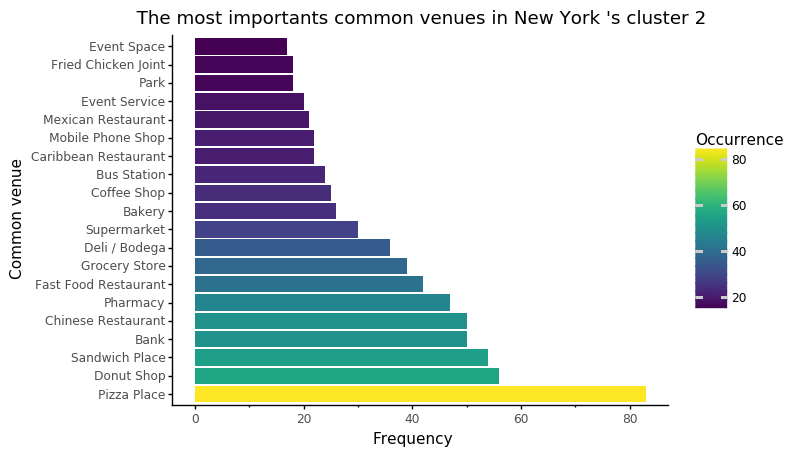

<ggplot: (85692605213)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 1/New York_city_and_cluster_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


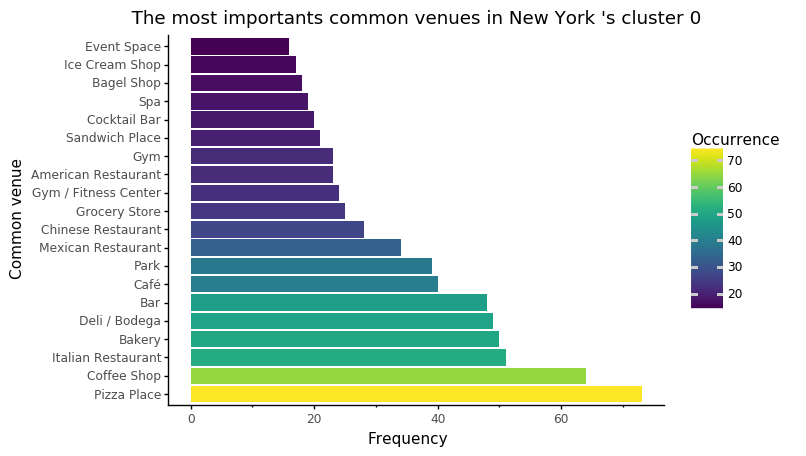

<ggplot: (-9223371951161331424)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 1/New York_city_and_cluster_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


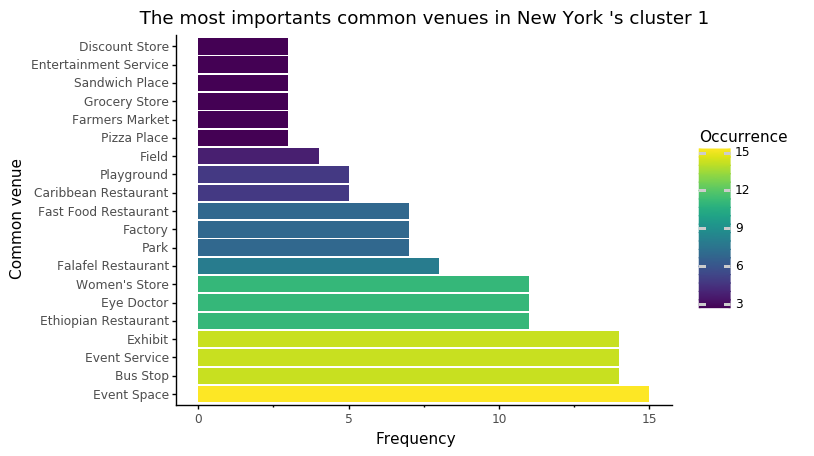

<ggplot: (-9223371951161317246)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 1/Toronto_city_and_cluster_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


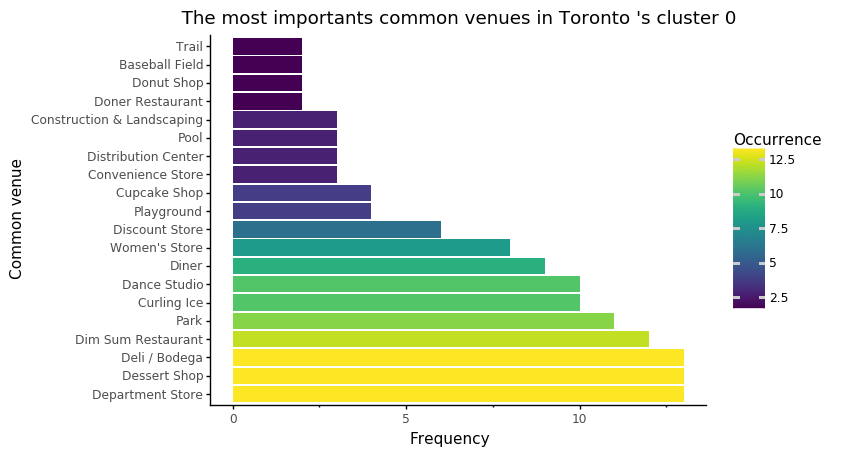

<ggplot: (85693734036)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 1/Toronto_city_and_cluster_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


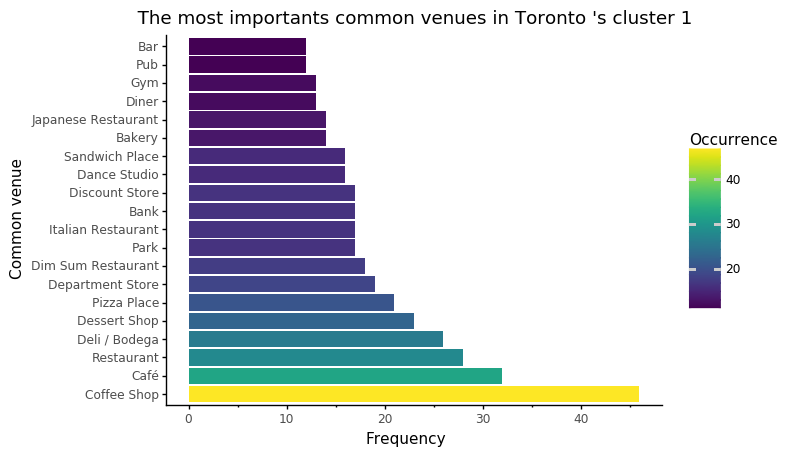

<ggplot: (-9223371951161315847)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 1/Toronto_city_and_cluster_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


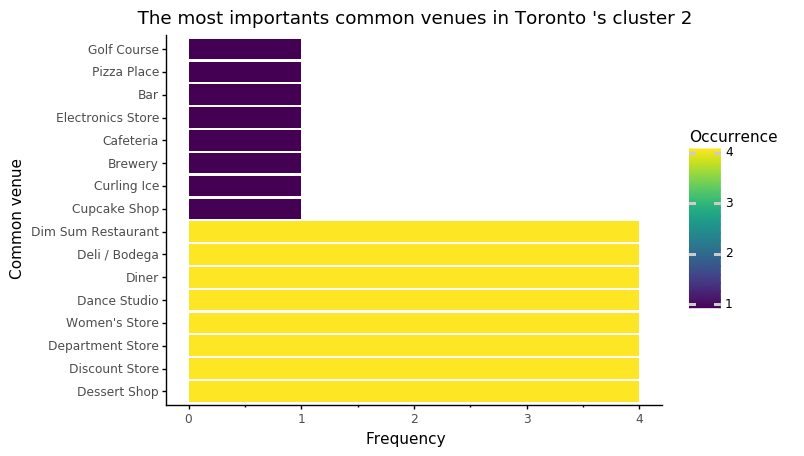

<ggplot: (-9223371951160999515)>


In [46]:
for City_Cluster in analysis_approach_1["City_Cluster"].unique():
    df = analysis_approach_1[analysis_approach_1.City_Cluster==City_Cluster].sort_values("Occurrence",ascending=False)
    city = df.City.unique()[0]
    cluster = df["Cluster Labels"].unique()[0]
    indice = df[["City_Cluster","Common Venue", "Occurrence"]].drop_duplicates().head(20)
    df = df.merge(indice)
    Venue_cat = pd.Categorical(df['Common Venue'], categories=df['Common Venue'].value_counts().index.tolist())
    df = df.assign(Venue_cat = Venue_cat)
    p = (
    ggplot(df)
    + geom_bar(aes(x='Venue_cat',fill='Occurrence'), show_legend=True,size=2)
    + coord_flip()
    + theme_classic()
    + xlab("Common venue") 
    + ylab("Frequency") 
    + ggtitle("   The most importants common venues in {} 's cluster {}".format(city, cluster)))
    file_path = "C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 1/"
    p.save(file_path+ City_Cluster+'.png')
    print(p)
    


##### analysis approach 2 :  analysis with **City, Borough and Cluster Labels**
In this analysis approach you will determine the discriminating venue categories that distinguish each cluster by using **City, Borough and Cluster Labels** variables. Through this second analysis, we will complete the first analysis by **adding granularity**.In this way ,we will be able to identify the most important common  venue in the clusters of each Borough in the city by calculating **their occurrence.** Finally, you plot the result to figure out the pertinence of analysis 

In [47]:
analysis_approach_2  = data_clusters_new.merge(data_clusters_new.groupby(by = ["City","Borough", "Cluster Labels", "Common Venue"]).apply(lambda x:x.shape[0]).reset_index().rename(columns={0:"Occurrence"}).sort_values(by = ["City", "Cluster Labels","Borough","Occurrence"]))
analysis_approach_2["City_Borough_Cluster"] =analysis_approach_2["City"].astype('str') + '_' + analysis_approach_2['Borough'].astype('str') + '_' + analysis_approach_2['Cluster Labels'].astype('str')
analysis_approach_2.head() 

Borough      City  Cluster Labels Common Venue      Position on the :  \
0   Bronx  New York               2     Pharmacy  1st Most Common Venue   
1   Bronx  New York               2     Pharmacy  1st Most Common Venue   
2   Bronx  New York               2     Pharmacy  1st Most Common Venue   
3   Bronx  New York               2     Pharmacy  1st Most Common Venue   
4   Bronx  New York               2     Pharmacy  1st Most Common Venue   

   Occurrence City_Borough_Cluster  
0          16     New York_Bronx_2  
1          16     New York_Bronx_2  
2          16     New York_Bronx_2  
3          16     New York_Bronx_2  
4          16     New York_Bronx_2

C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/New York_Bronx_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


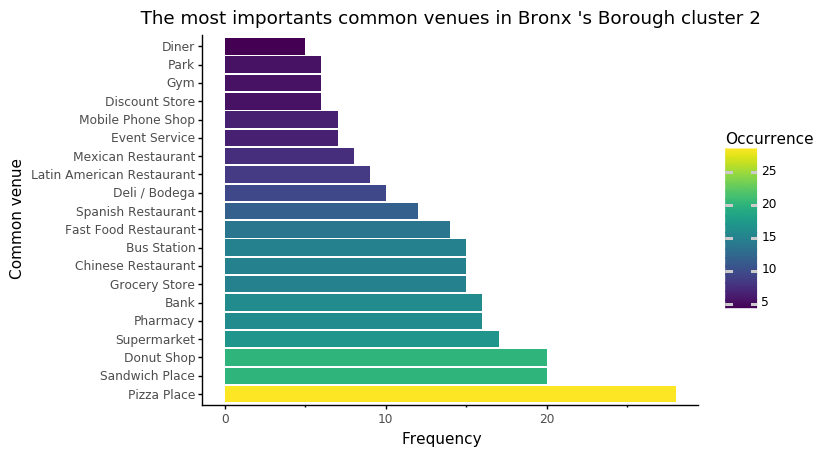

<ggplot: (85694269283)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/New York_Manhattan_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


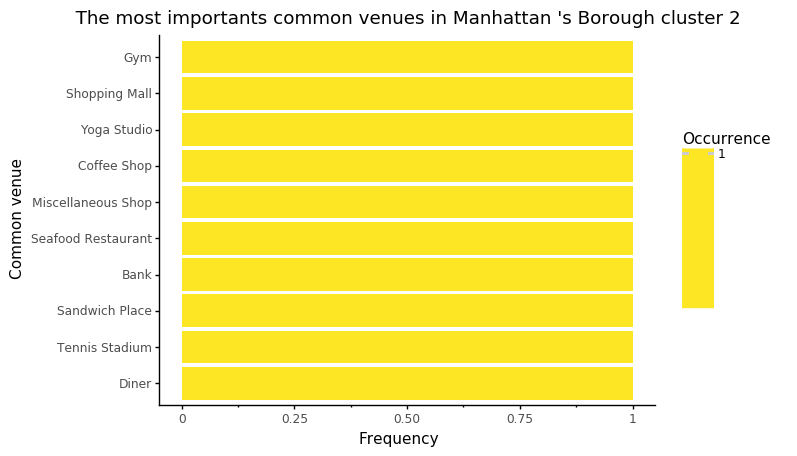

<ggplot: (-9223371951159205141)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/New York_Bronx_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


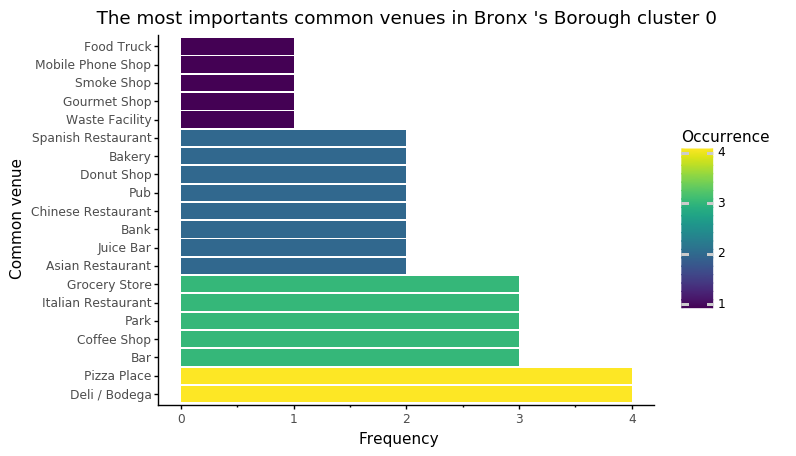

<ggplot: (85693919566)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/New York_Bronx_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


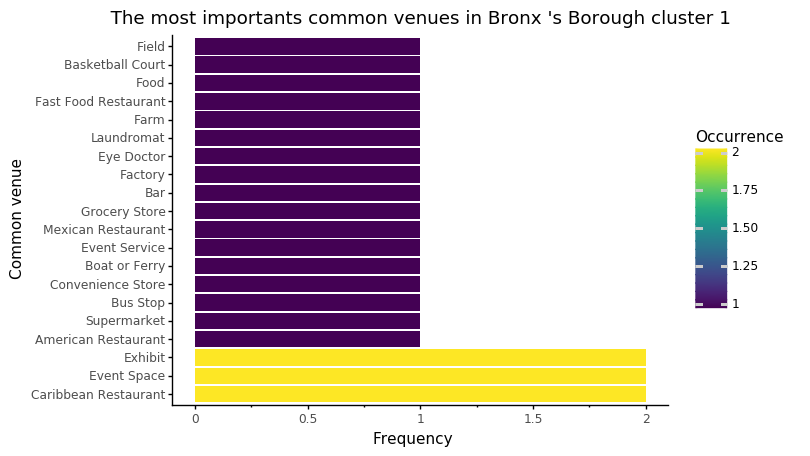

<ggplot: (85693442361)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/New York_Brooklyn_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


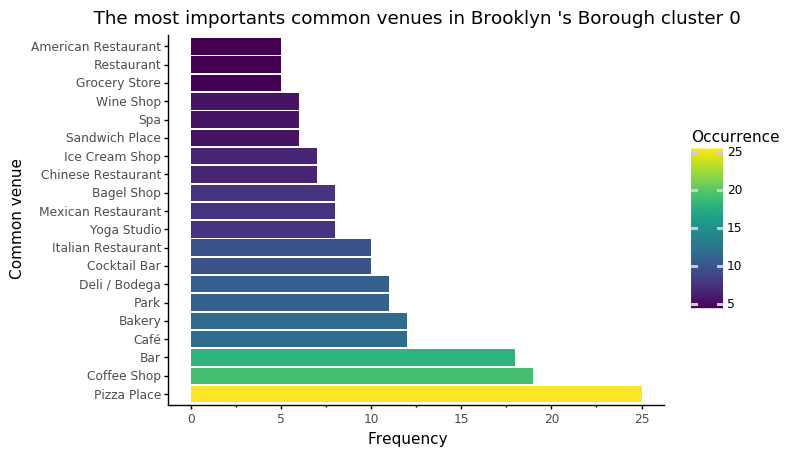

<ggplot: (-9223371951162563426)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/New York_Brooklyn_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


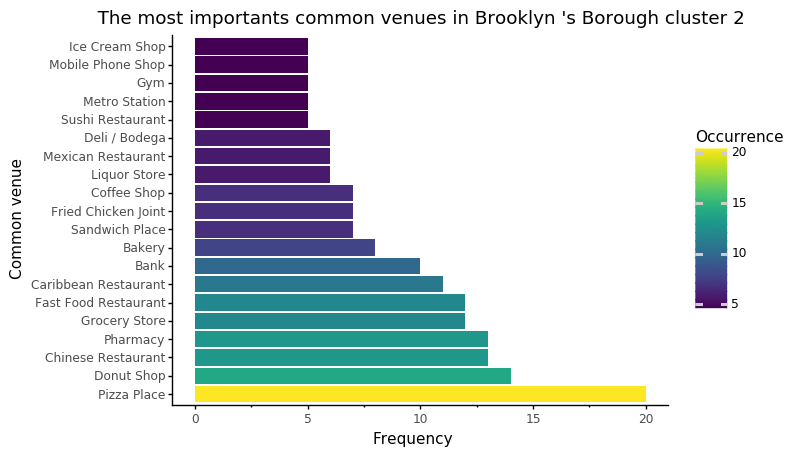

<ggplot: (-9223371951179718768)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/New York_Brooklyn_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


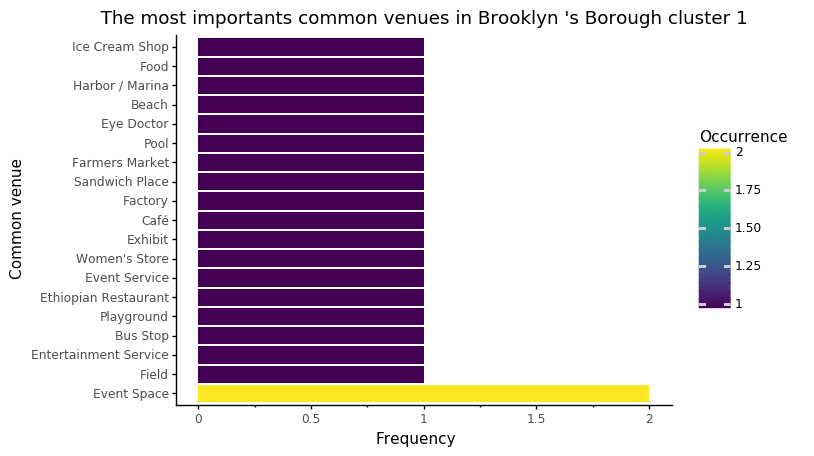

<ggplot: (-9223371951162158732)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/New York_Manhattan_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


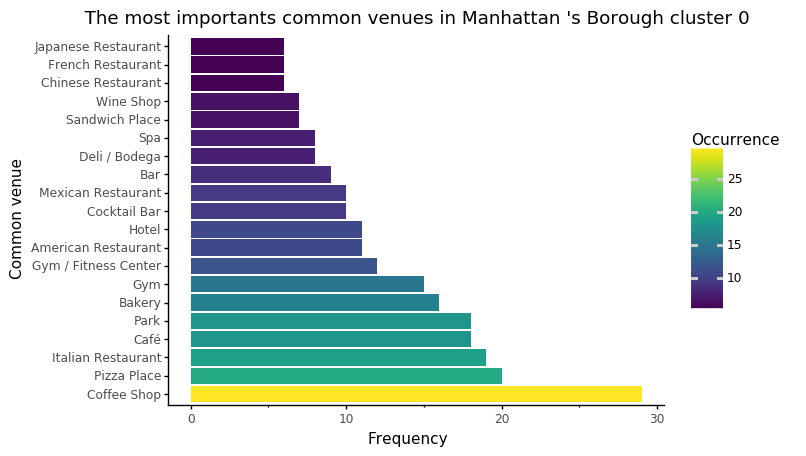

<ggplot: (85692602516)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/New York_Queens_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


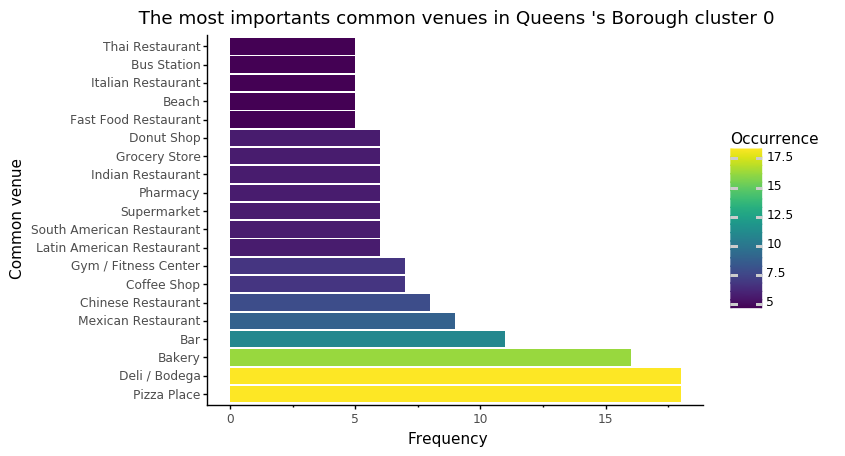

<ggplot: (85695831202)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/New York_Queens_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


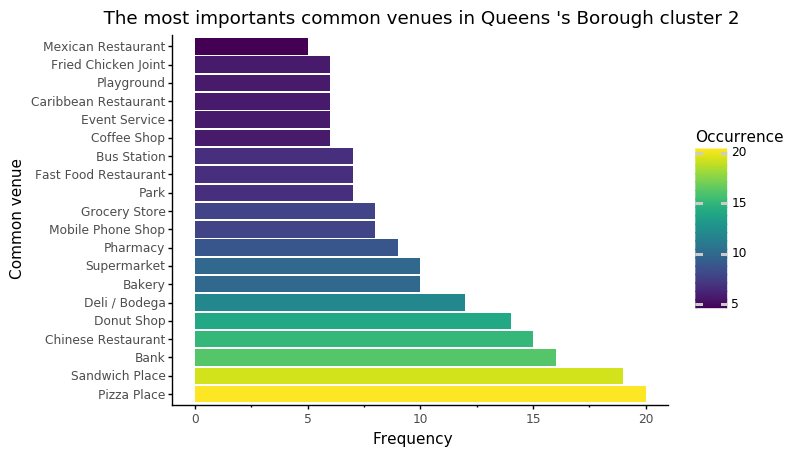

<ggplot: (-9223371951162316123)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/New York_Queens_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


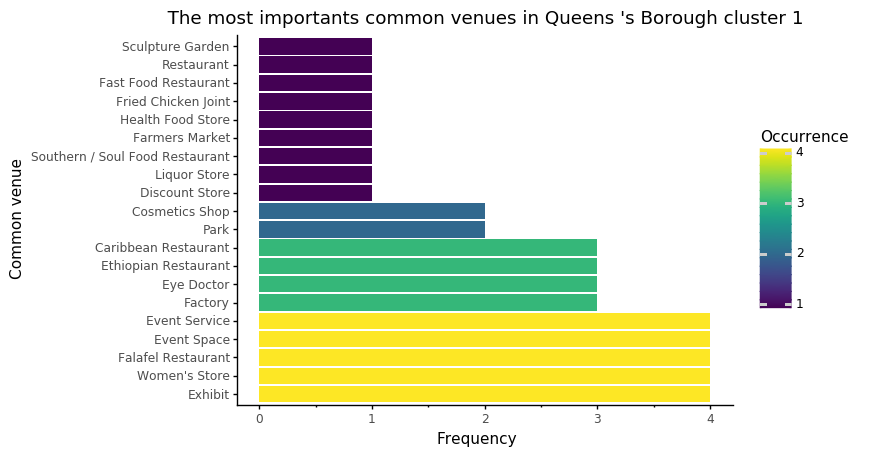

<ggplot: (85692594454)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/New York_Staten Island_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


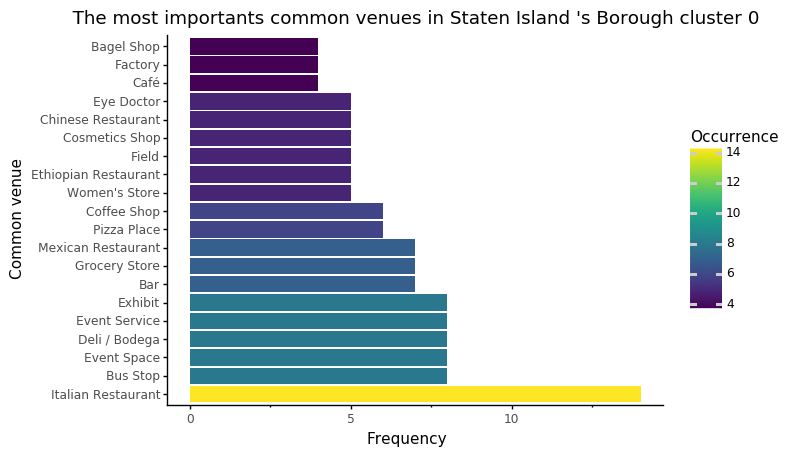

<ggplot: (-9223371951162105298)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/New York_Staten Island_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


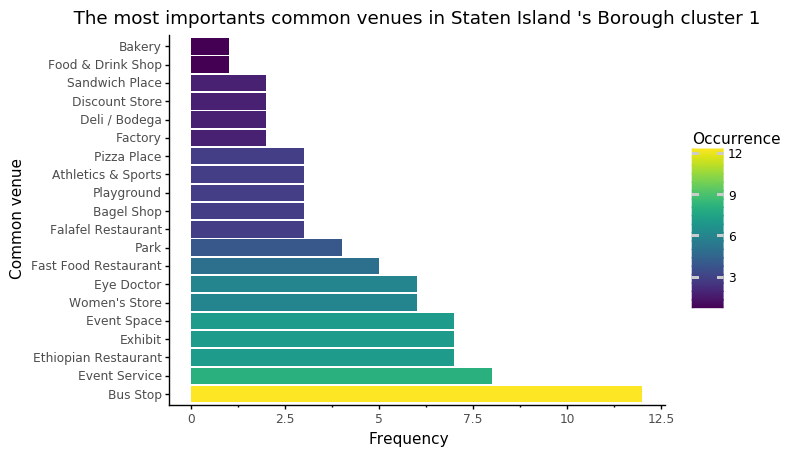

<ggplot: (-9223371951161808061)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/New York_Staten Island_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


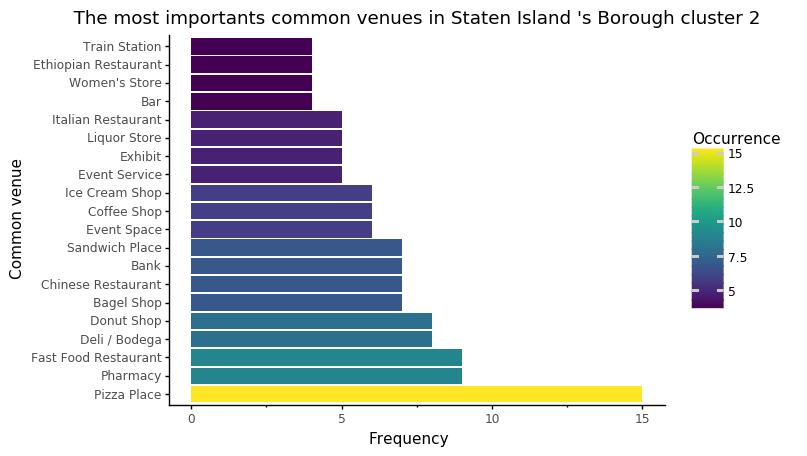

<ggplot: (85692965366)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_North York_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


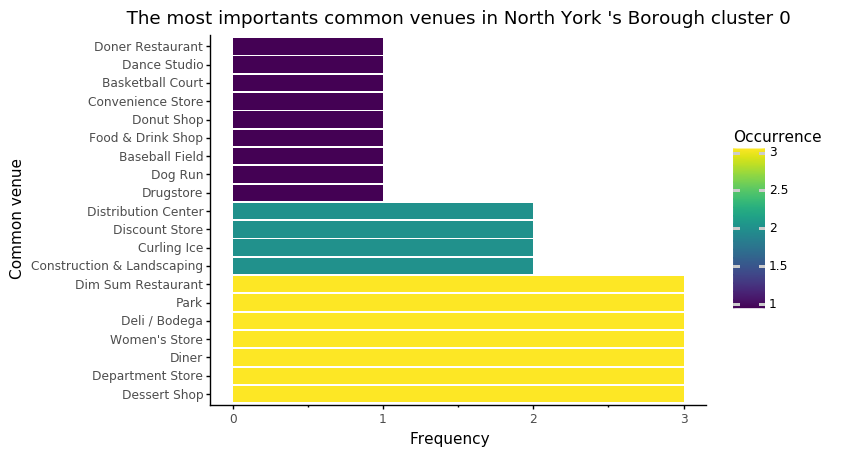

<ggplot: (85692924890)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_North York_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


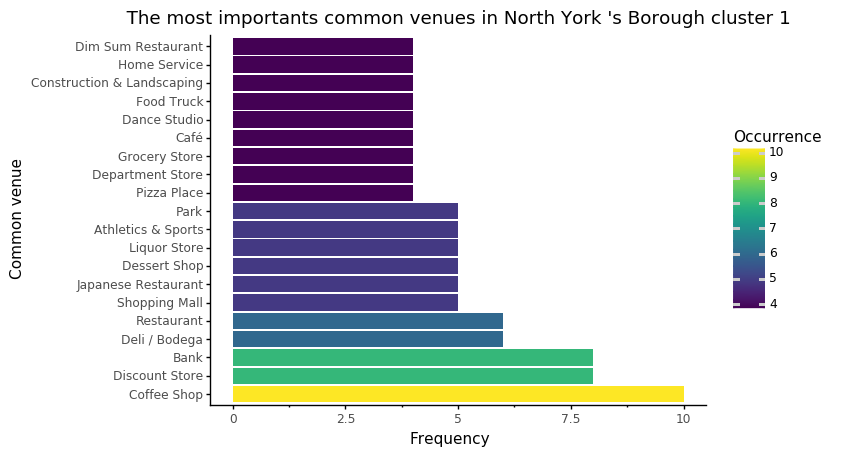

<ggplot: (-9223371951161842607)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_Downtown Toronto_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


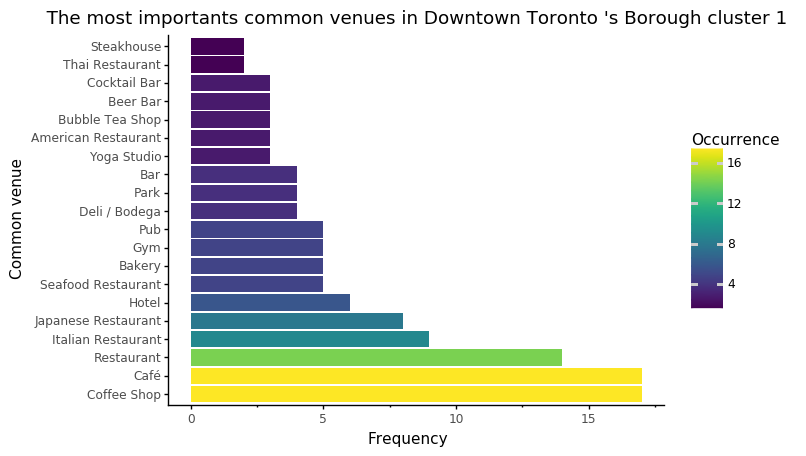

<ggplot: (-9223371951162381210)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_Scarborough_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


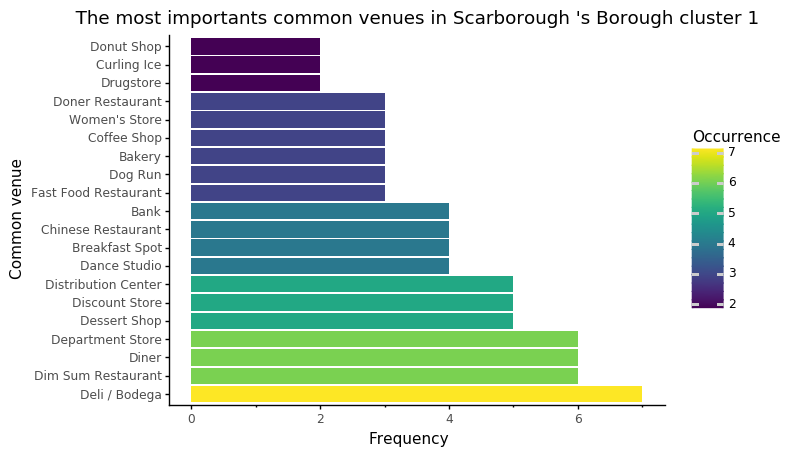

<ggplot: (-9223371951161283503)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_East York_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


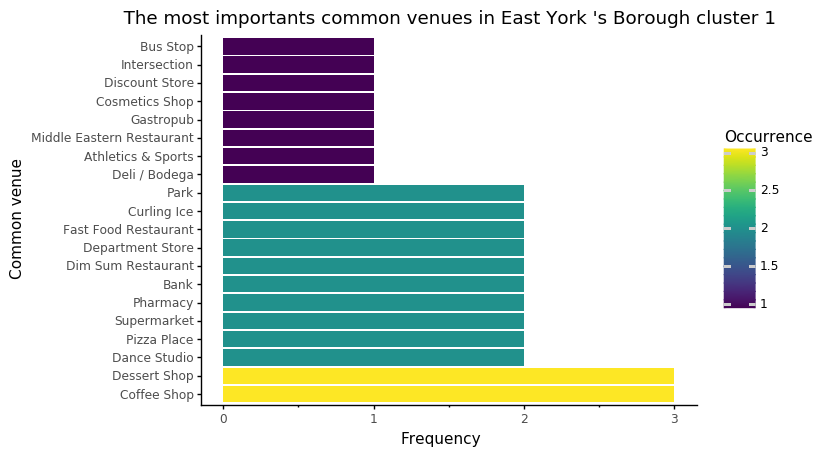

<ggplot: (-9223371951162163340)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_Etobicoke_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


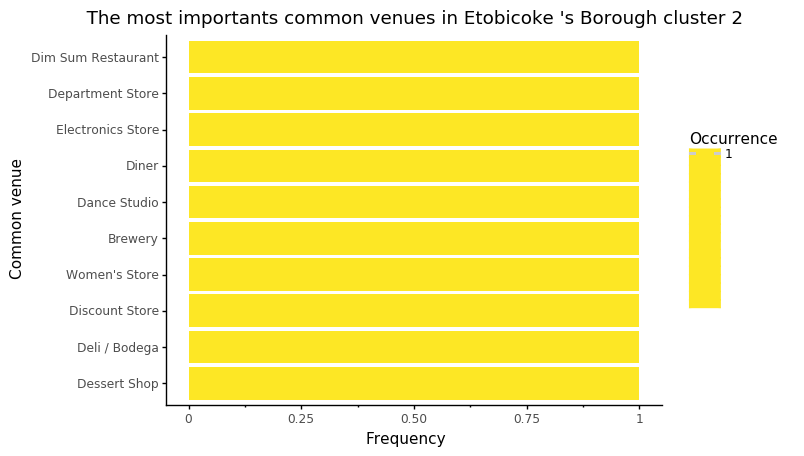

<ggplot: (85692441285)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_Scarborough_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


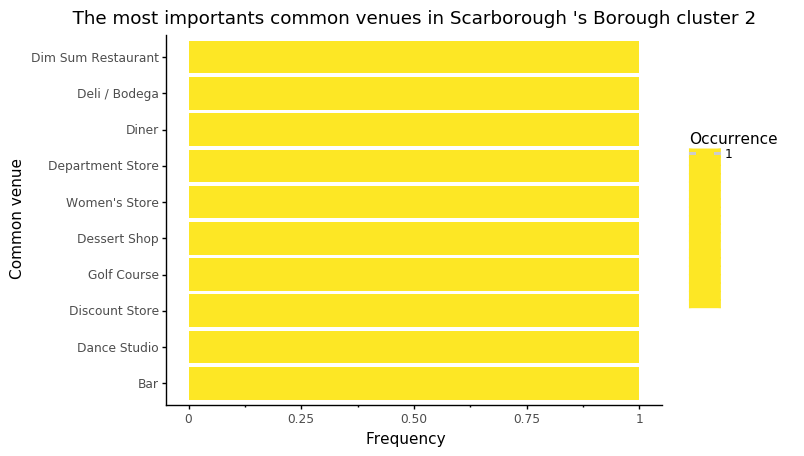

<ggplot: (-9223371951162502172)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_York_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


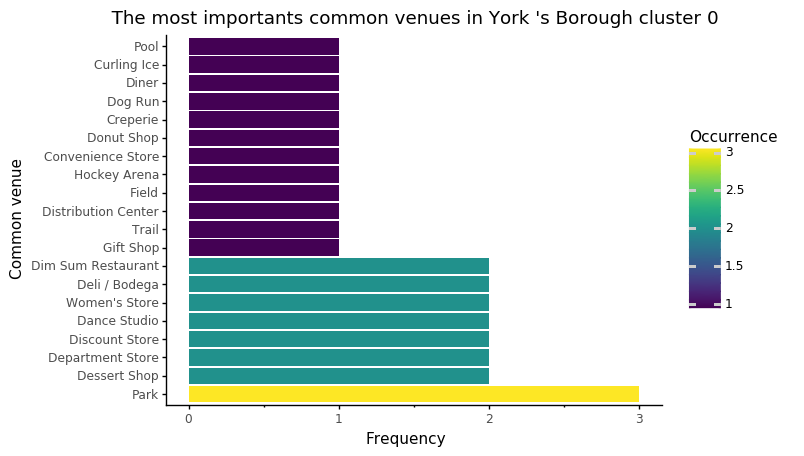

<ggplot: (-9223371951161023172)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_Etobicoke_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


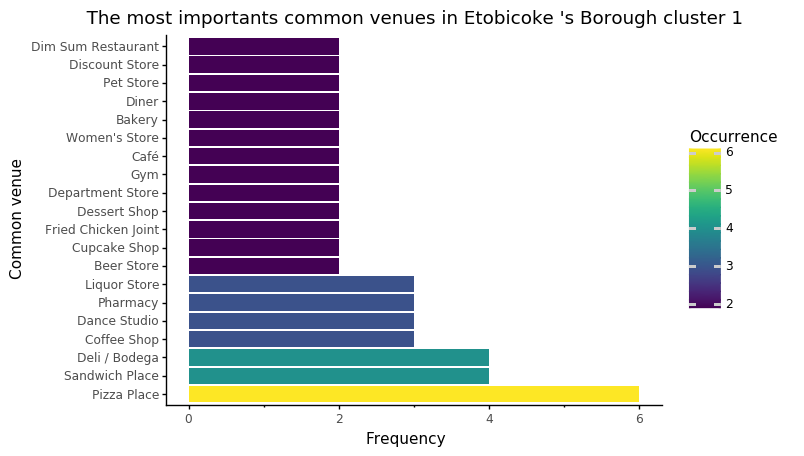

<ggplot: (85693440534)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_East Toronto_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


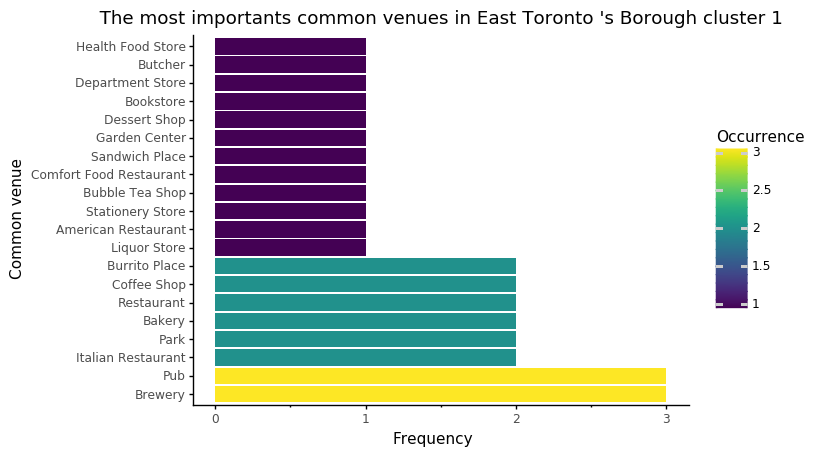

<ggplot: (-9223371951161043838)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_West Toronto_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


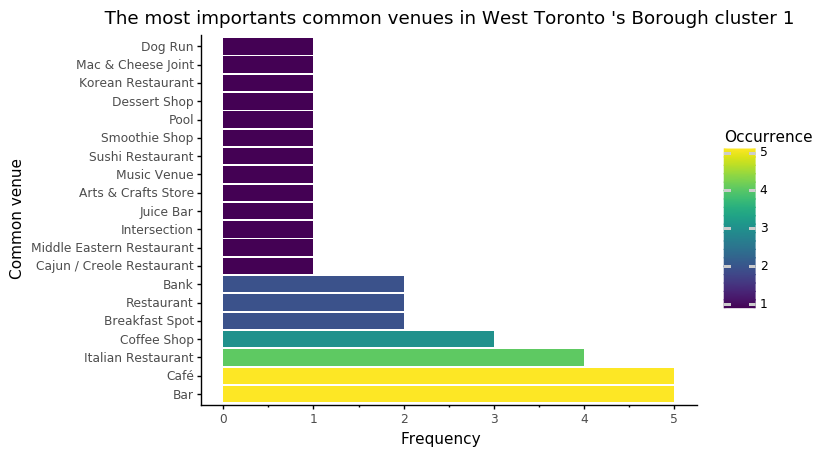

<ggplot: (-9223371951162533674)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_Scarborough_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


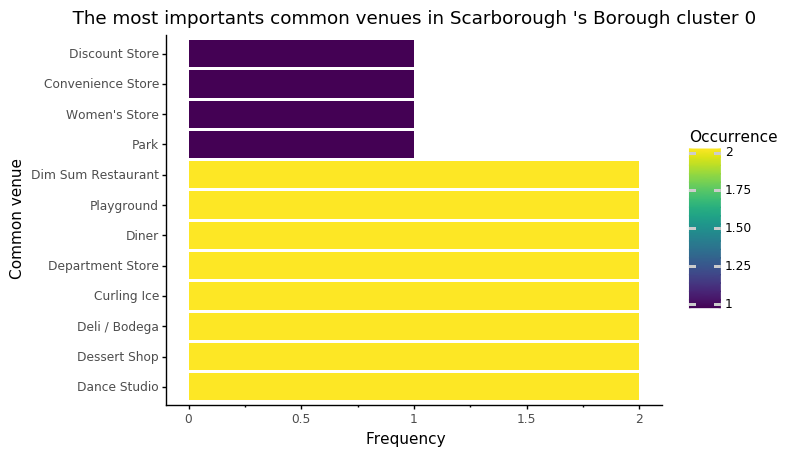

<ggplot: (85693955290)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_North York_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


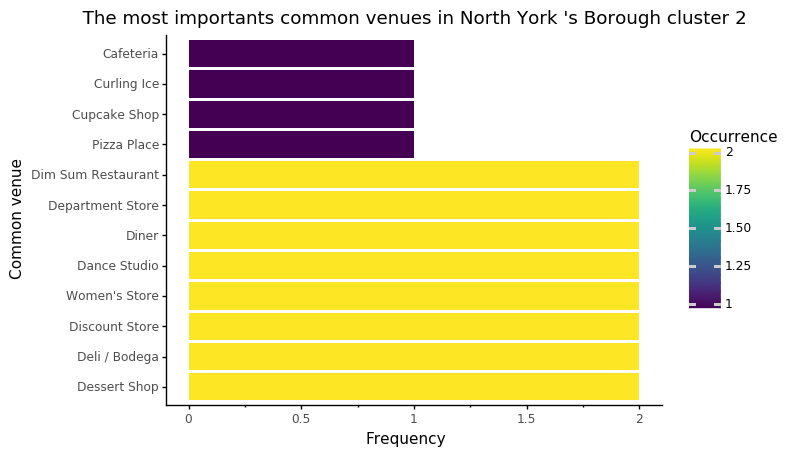

<ggplot: (85693456427)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_York_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


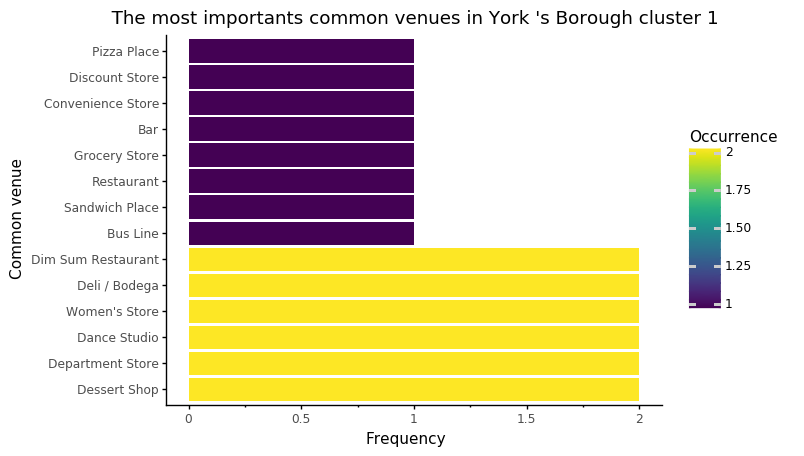

<ggplot: (-9223371951160833350)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_Central Toronto_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


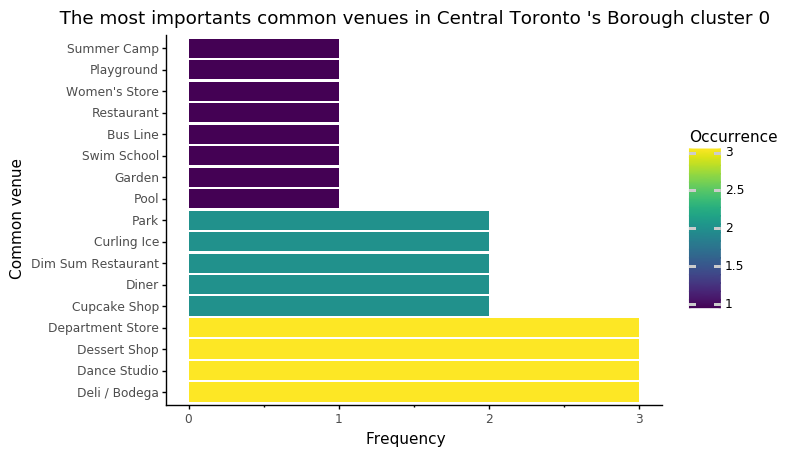

<ggplot: (-9223371951159211737)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_Central Toronto_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


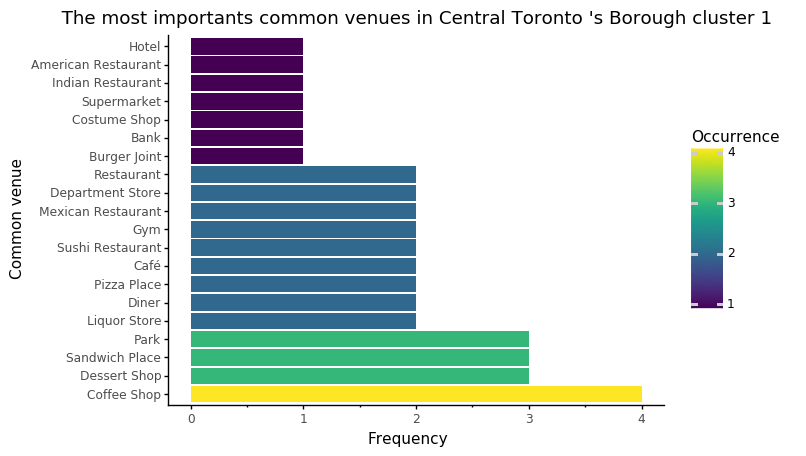

<ggplot: (85693764104)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_Mississauga_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


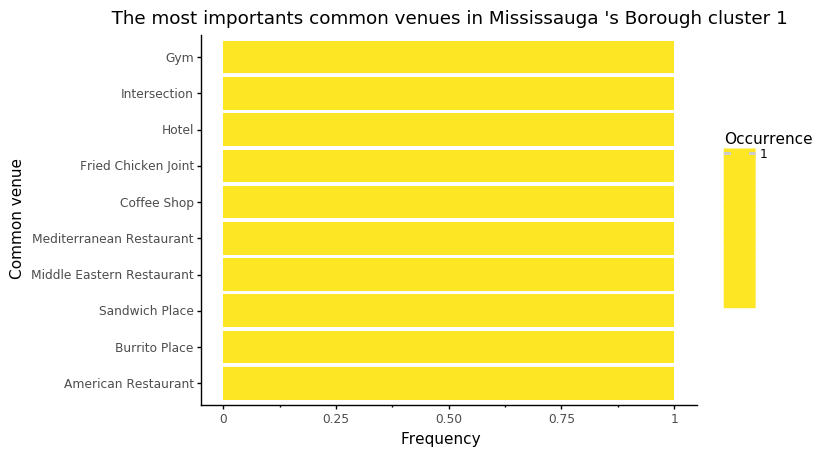

<ggplot: (-9223371951158927395)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_Downtown Toronto_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


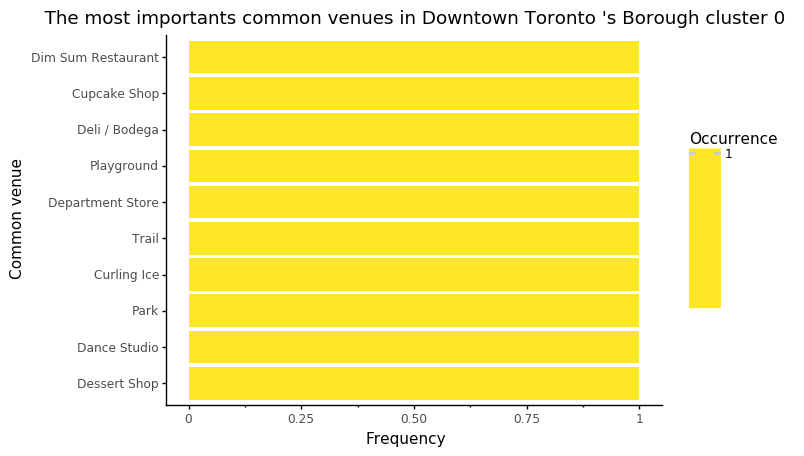

<ggplot: (85692648617)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/Toronto_Etobicoke_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


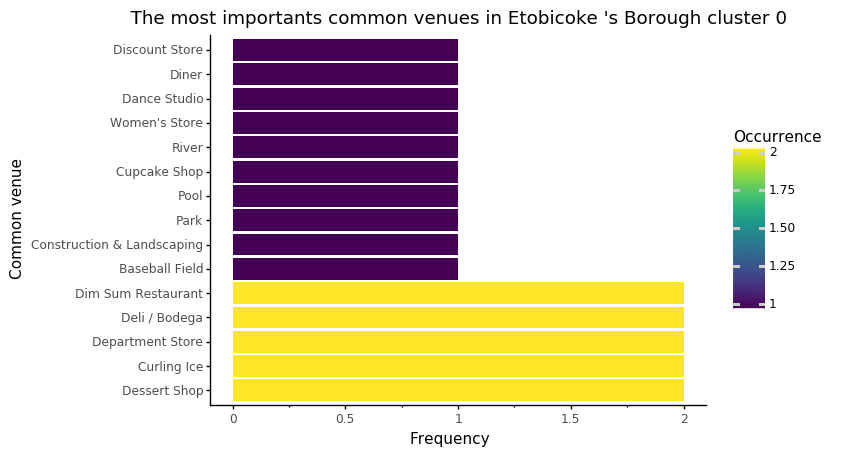

<ggplot: (-9223371951161315226)>


In [48]:
for City_Borough_Cluster in analysis_approach_2["City_Borough_Cluster"].unique():
    df = analysis_approach_2[analysis_approach_2.City_Borough_Cluster==City_Borough_Cluster].sort_values("Occurrence",ascending=False)
    city = df.City.unique()[0]
    cluster = df["Cluster Labels"].unique()[0]
    Borough = df["Borough"].unique()[0]
    indice = df[["City_Borough_Cluster","Common Venue", "Occurrence"]].drop_duplicates().head(20)
    df = df.merge(indice)
    Venue_cat = pd.Categorical(df['Common Venue'], categories=df['Common Venue'].value_counts().index.tolist())
    df = df.assign(Venue_cat = Venue_cat)
    p = (
    ggplot(df)
    + geom_bar(aes(x='Venue_cat',fill='Occurrence'), show_legend=True,size=2)
    + coord_flip()
    + theme_classic()
    + xlab("Common venue") 
    + ylab("Frequency") 
    + ggtitle("   The most importants common venues in {} 's Borough cluster {}".format(Borough, cluster)))
    file_path = "C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 2/"
    p.save(file_path+ City_Borough_Cluster+'.png')
    print(p)
    




##### analysis approach 3 :  analysis with **City, Borough, Cluster Labels and Common Venue position  **
In analysis approach 1 and analysis approach 2, we take all common venue position or as we know 
**1st Most Common Venue is more important than 2nd Most Common Venue and the 2nd Most Common Venue is more important than 3rd Most Common Venue .etcs ...**. So let's take this information to see th impact. 
In this analysis approach you will determine the discriminating venue categories that distinguish each cluster by using **City, Borough , Cluster Labels,and  Common Venue position** variables. Through this third analysis, we will complete the second analysis by **another adding granularity**.In this way ,we will be able to identify the most important common  venue in the clusters of each Borough in the city by calculating **their occurrence.** Finally, you plot the result to figure out the pertinence of analysis . To reduice the analysis, let's take **only the  1st Most Common Venue.** 

In [50]:
analysis_approach_3  = analysis_approach_2[analysis_approach_2["Position on the :"]=="1st Most Common Venue"].reset_index(drop=True)


Borough      City  Cluster Labels Common Venue      Position on the :  \
0   Bronx  New York               2     Pharmacy  1st Most Common Venue   
1   Bronx  New York               2     Pharmacy  1st Most Common Venue   
2   Bronx  New York               2     Pharmacy  1st Most Common Venue   
3   Bronx  New York               2     Pharmacy  1st Most Common Venue   
4   Bronx  New York               2     Pharmacy  1st Most Common Venue   

   Occurrence City_Borough_Cluster  
0          16     New York_Bronx_2  
1          16     New York_Bronx_2  
2          16     New York_Bronx_2  
3          16     New York_Bronx_2  
4          16     New York_Bronx_2

In [55]:
analysis_approach_3  = data_clusters_new[data_clusters_new["Position on the :"]=="1st Most Common Venue"].merge(data_clusters_new[data_clusters_new["Position on the :"]=="1st Most Common Venue"].groupby(by = ["City","Borough", "Cluster Labels", "Common Venue"]).apply(lambda x:x.shape[0]).reset_index().rename(columns={0:"Occurrence"}).sort_values(by = ["City", "Cluster Labels","Borough","Occurrence"]))
analysis_approach_3["City_Borough_Cluster"] =analysis_approach_3["City"].astype('str') + '_' + analysis_approach_3['Borough'].astype('str') + '_' + analysis_approach_3['Cluster Labels'].astype('str')
analysis_approach_3.head() 

Borough      City  Cluster Labels Common Venue      Position on the :  \
0   Bronx  New York               2     Pharmacy  1st Most Common Venue   
1   Bronx  New York               2     Pharmacy  1st Most Common Venue   
2   Bronx  New York               2     Pharmacy  1st Most Common Venue   
3   Bronx  New York               2     Pharmacy  1st Most Common Venue   
4   Bronx  New York               2     Pharmacy  1st Most Common Venue   

   Occurrence City_Borough_Cluster  
0           5     New York_Bronx_2  
1           5     New York_Bronx_2  
2           5     New York_Bronx_2  
3           5     New York_Bronx_2  
4           5     New York_Bronx_2

C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/New York_Bronx_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


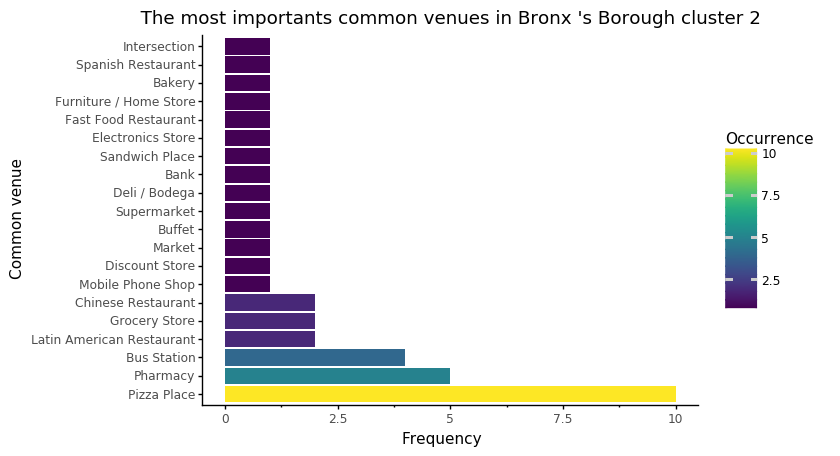

<ggplot: (85692464886)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/New York_Manhattan_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


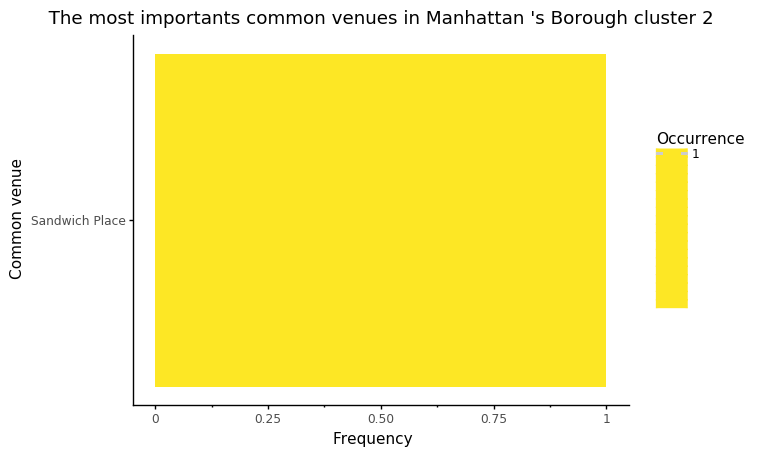

<ggplot: (-9223371951160505063)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/New York_Bronx_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


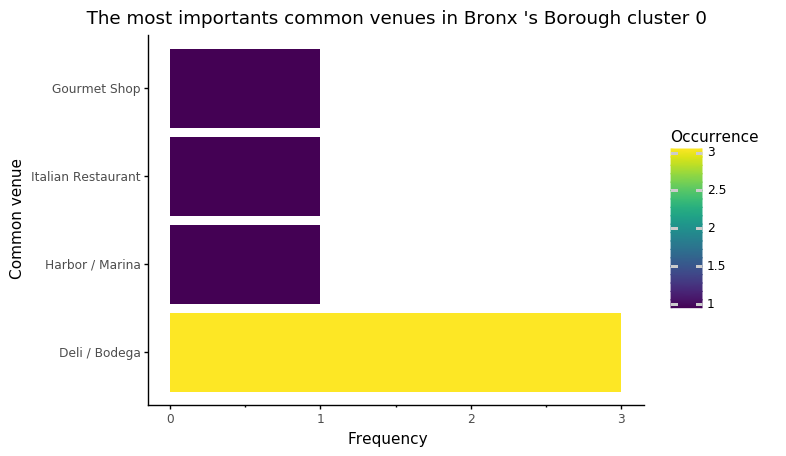

<ggplot: (-9223371951159251824)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/New York_Bronx_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


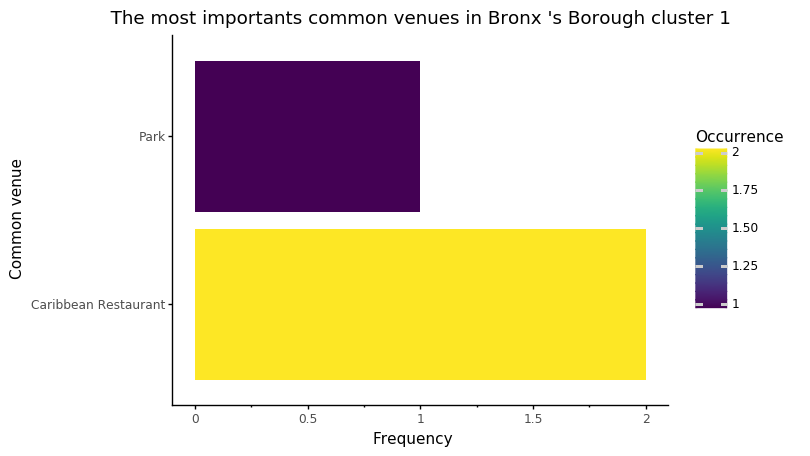

<ggplot: (85692927026)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/New York_Brooklyn_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


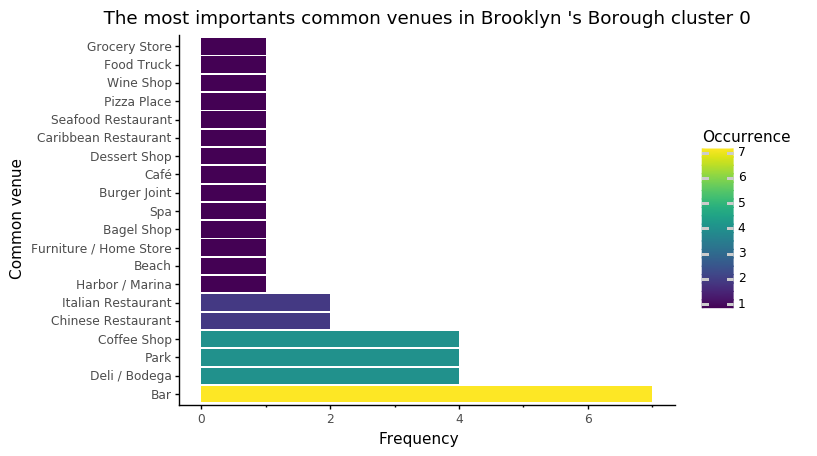

<ggplot: (-9223371951163579637)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/New York_Brooklyn_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


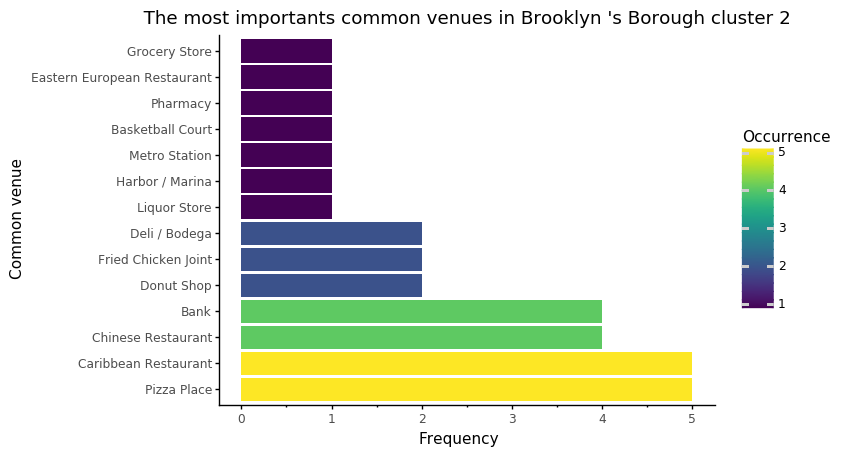

<ggplot: (85692944988)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/New York_Brooklyn_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


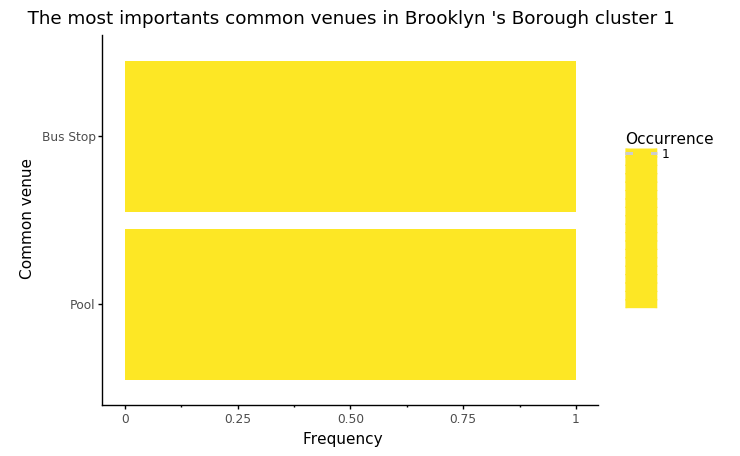

<ggplot: (-9223371951162461468)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/New York_Manhattan_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


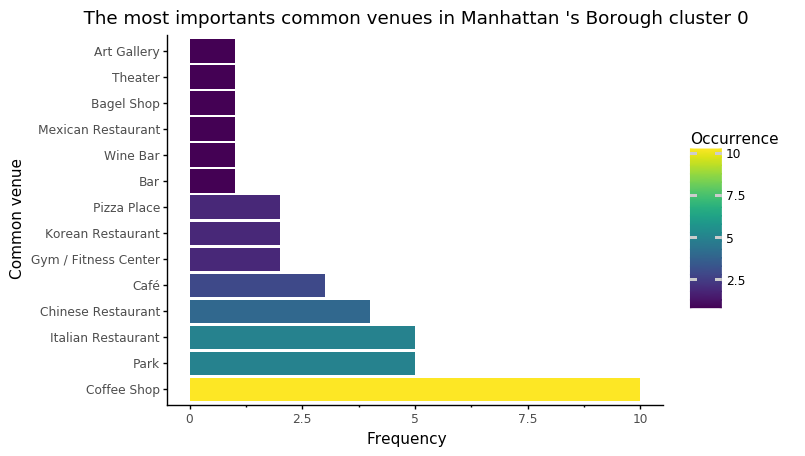

<ggplot: (-9223371951162336284)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/New York_Queens_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


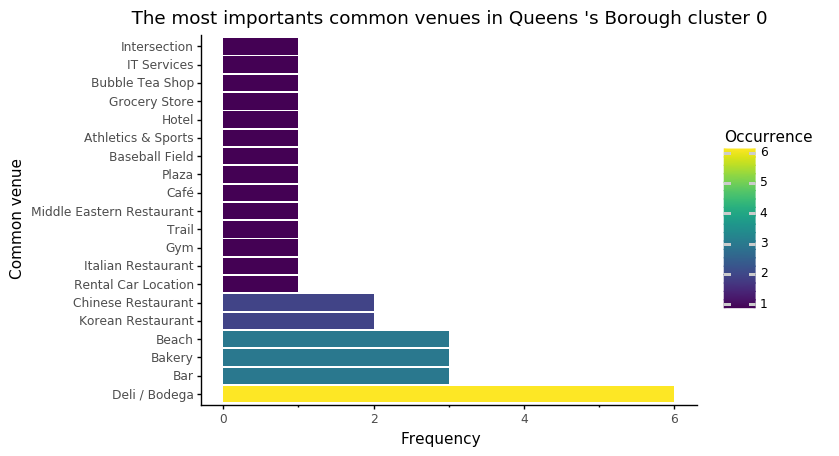

<ggplot: (-9223371951159249983)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/New York_Queens_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


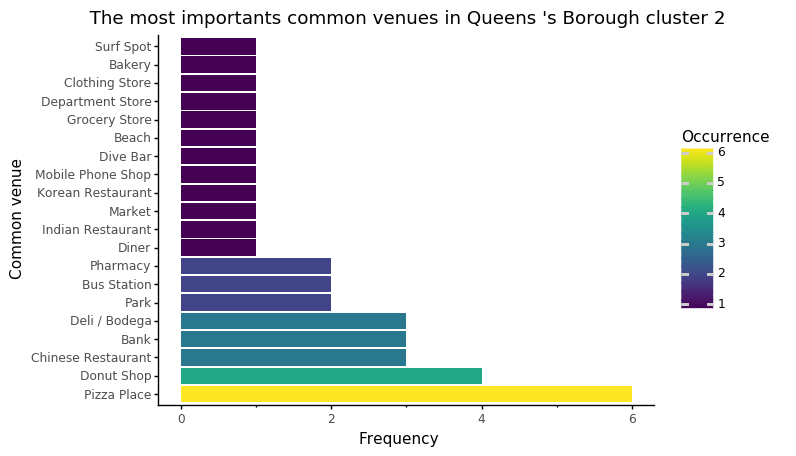

<ggplot: (-9223371951161267498)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/New York_Queens_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


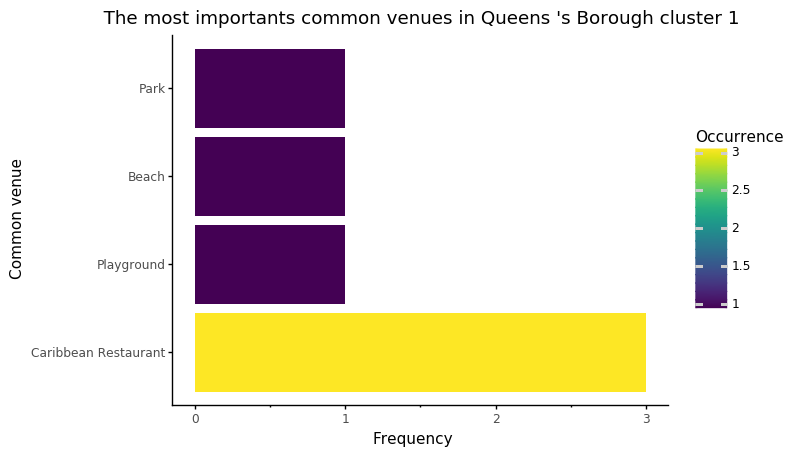

<ggplot: (85686807616)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/New York_Staten Island_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


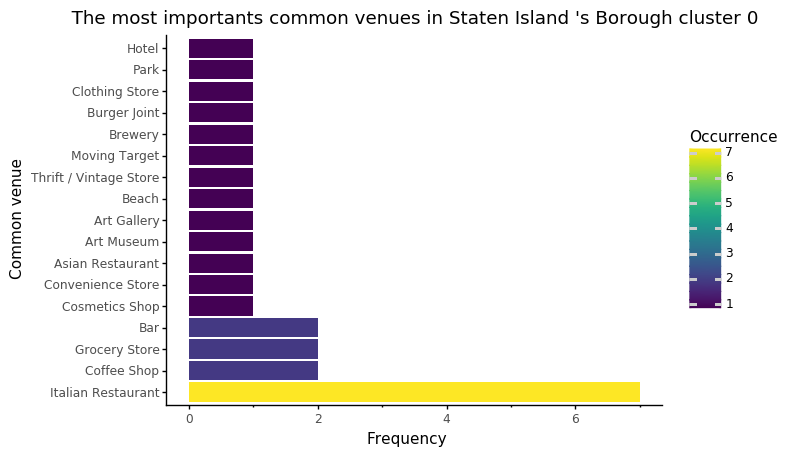

<ggplot: (85694271373)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/New York_Staten Island_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


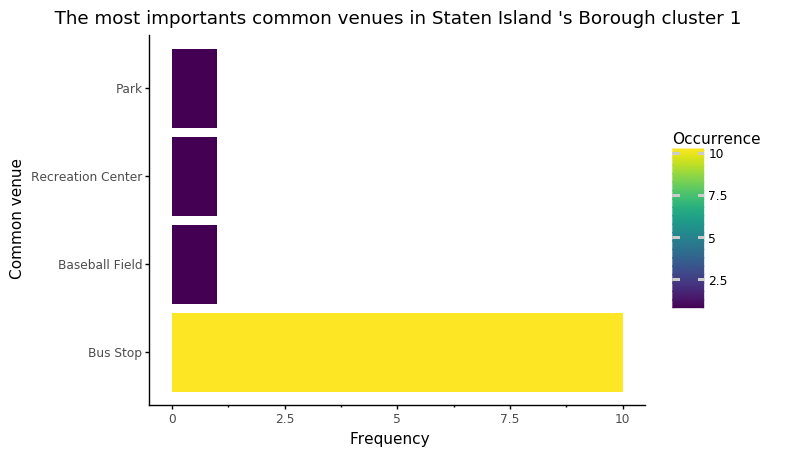

<ggplot: (-9223371951162452101)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/New York_Staten Island_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


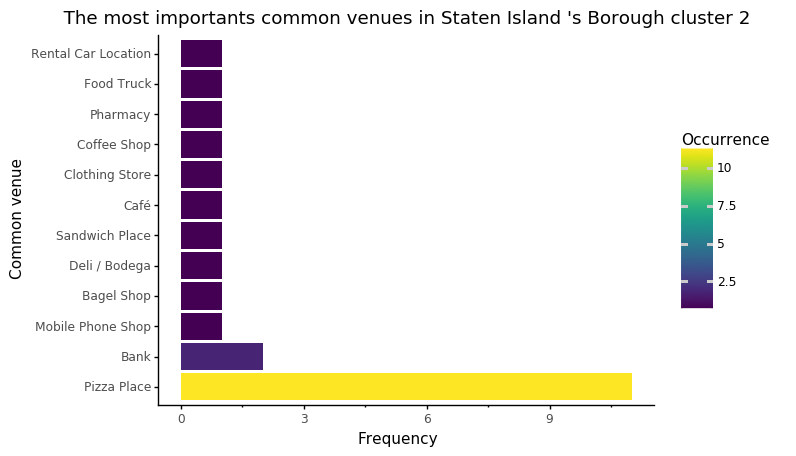

<ggplot: (-9223371951159251105)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_North York_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


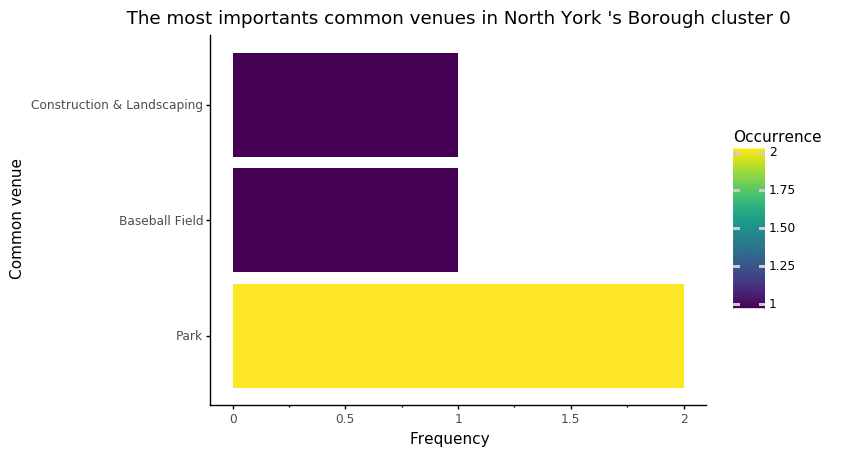

<ggplot: (85693225287)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_North York_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


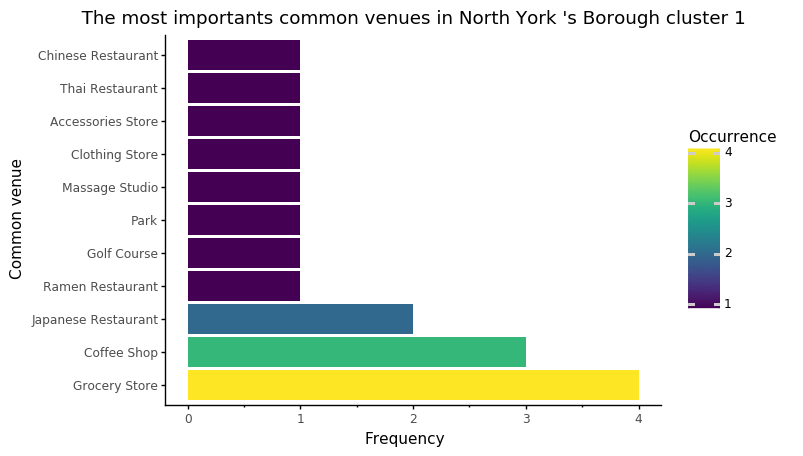

<ggplot: (-9223371951160574874)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_Downtown Toronto_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


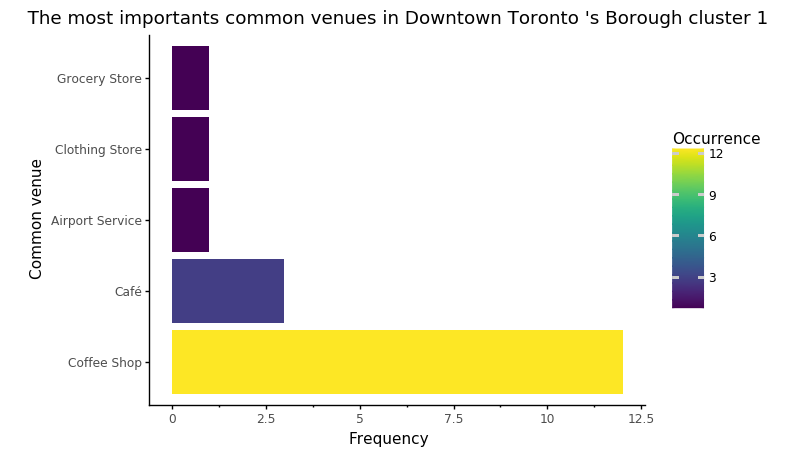

<ggplot: (85692624932)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_Scarborough_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


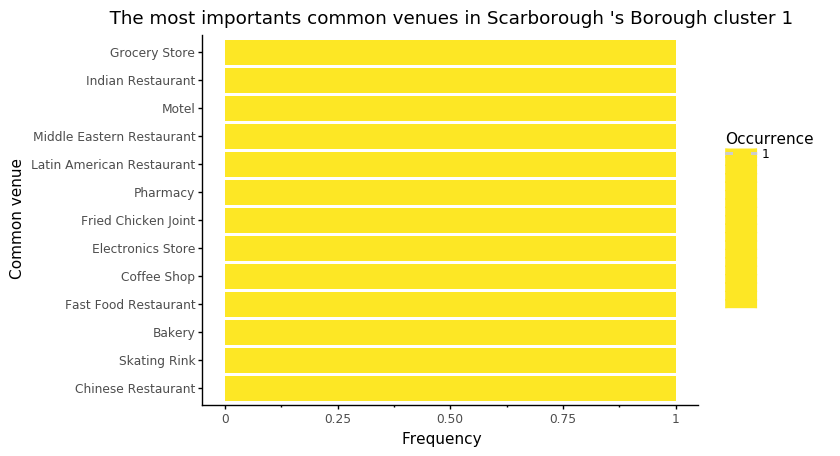

<ggplot: (85694233920)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_East York_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


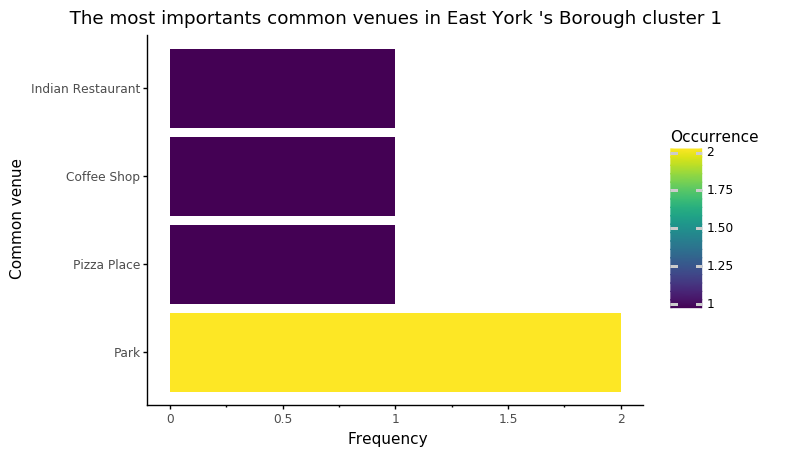

<ggplot: (85692423225)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_Etobicoke_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


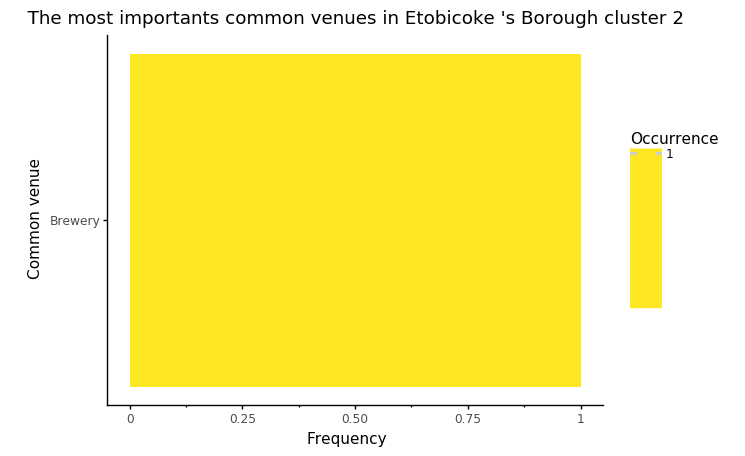

<ggplot: (-9223371951160844214)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_Scarborough_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


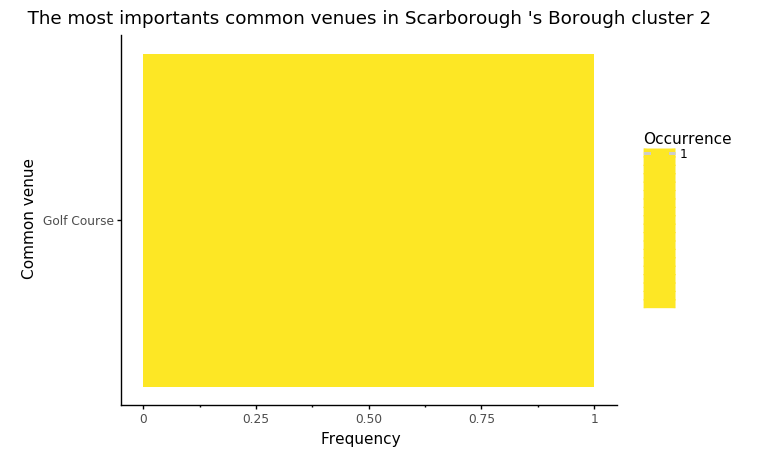

<ggplot: (85692624932)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_York_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


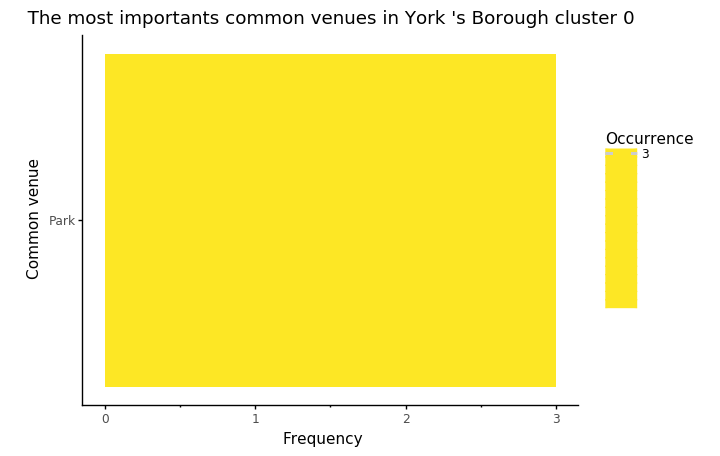

<ggplot: (85693975181)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_Etobicoke_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


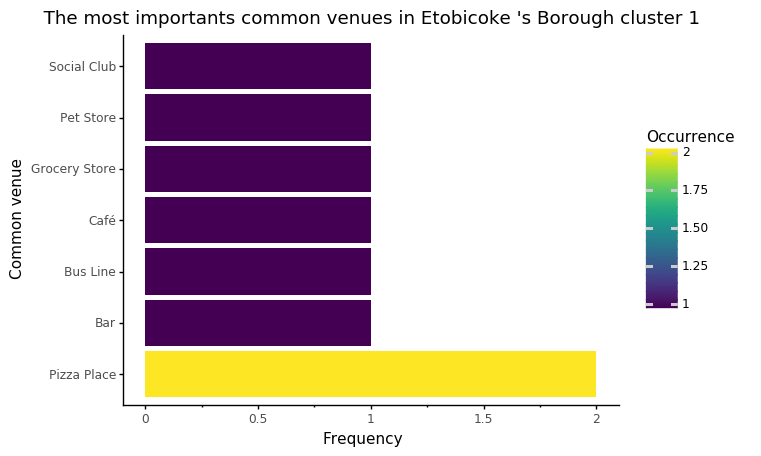

<ggplot: (-9223371951160806968)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_East Toronto_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


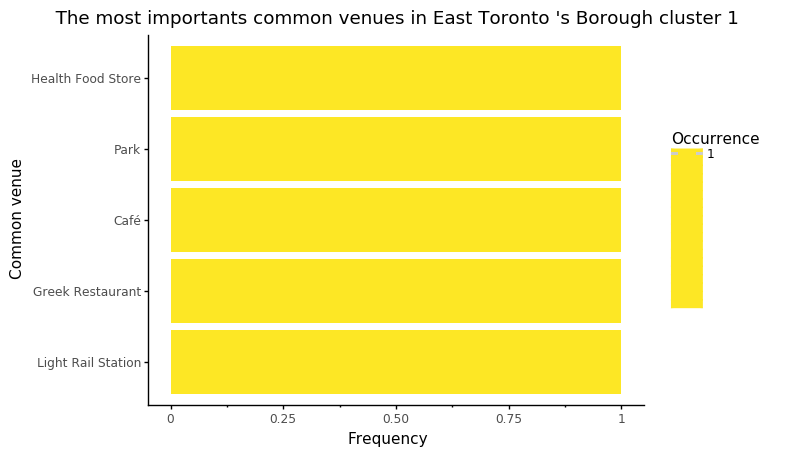

<ggplot: (85675058289)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_West Toronto_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


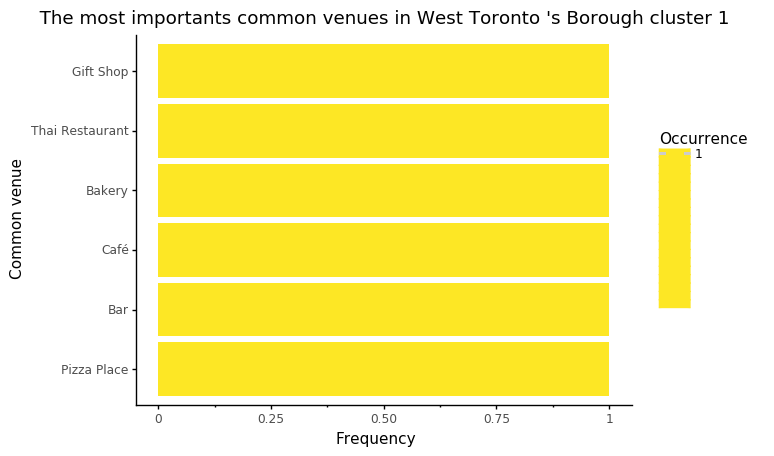

<ggplot: (-9223371951179753973)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_Scarborough_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


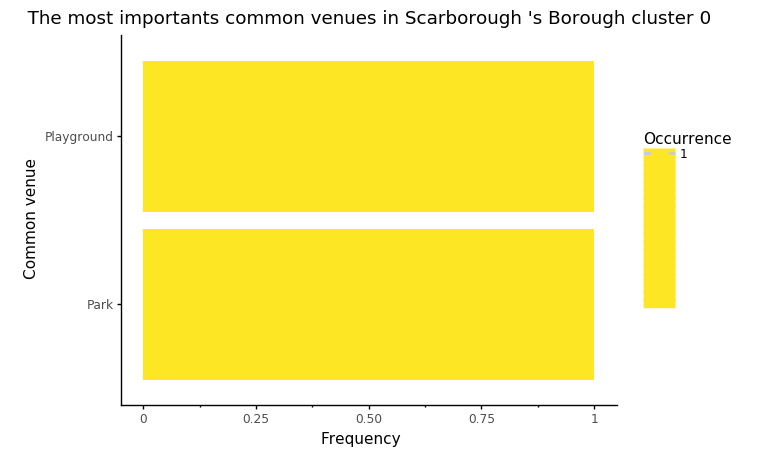

<ggplot: (85695525857)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_North York_2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


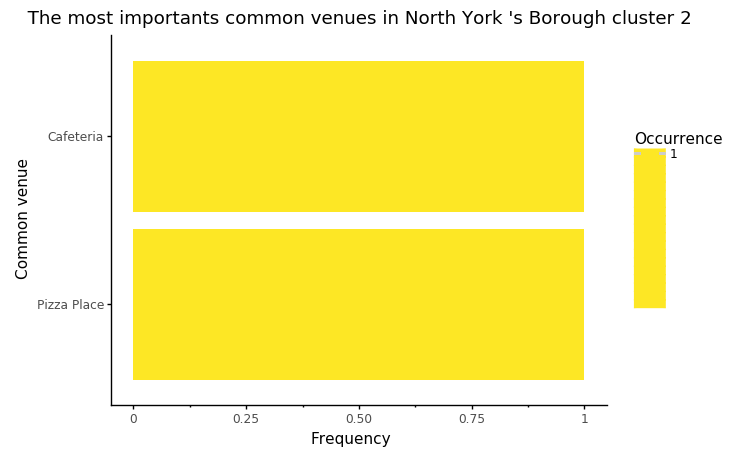

<ggplot: (85692311444)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_York_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


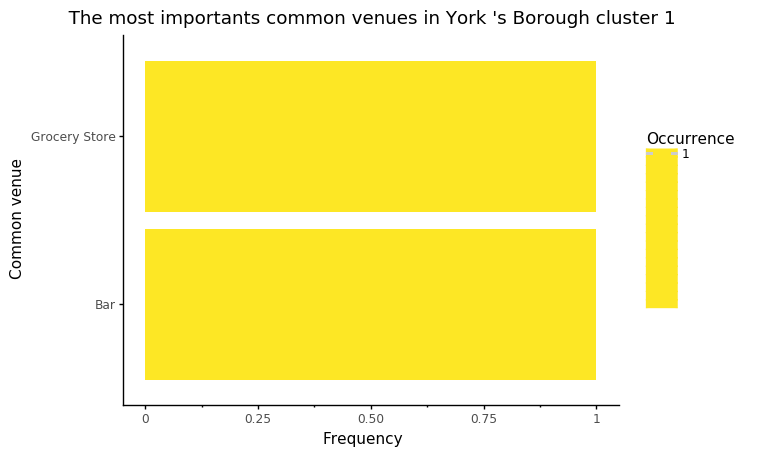

<ggplot: (85692479766)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_Central Toronto_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


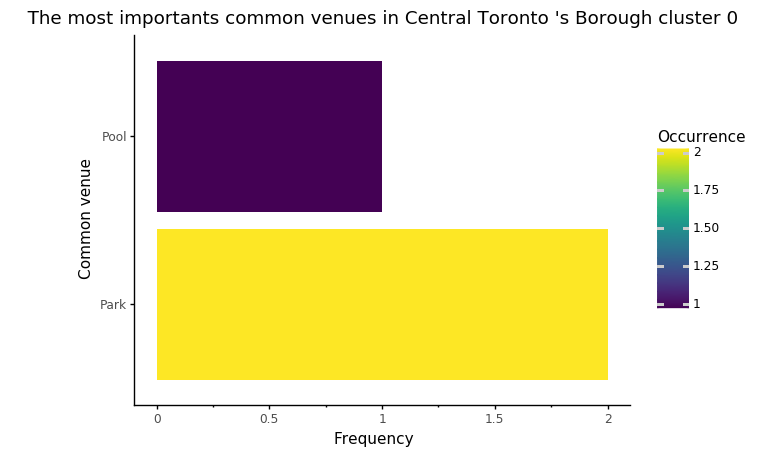

<ggplot: (85692629936)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_Central Toronto_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


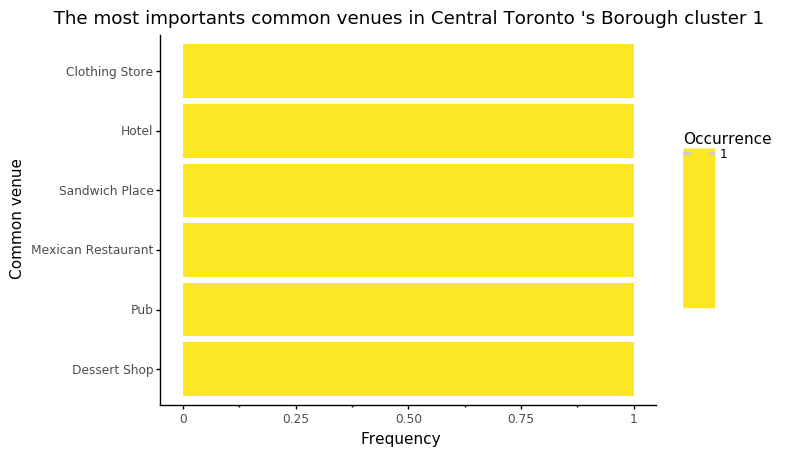

<ggplot: (-9223371951161848793)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_Mississauga_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


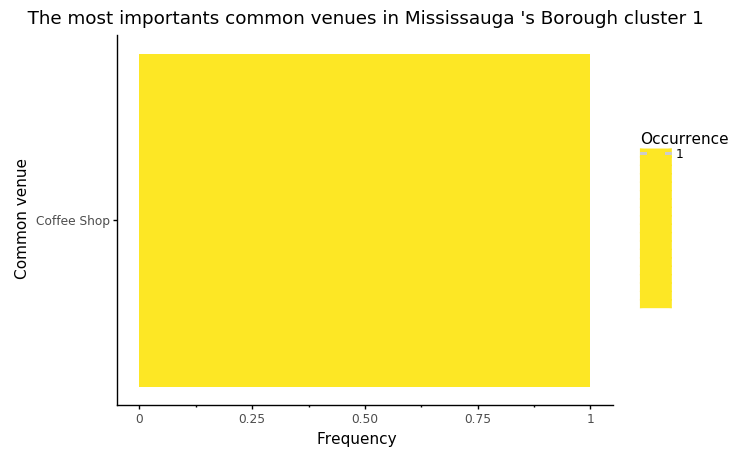

<ggplot: (85675018167)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_Downtown Toronto_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


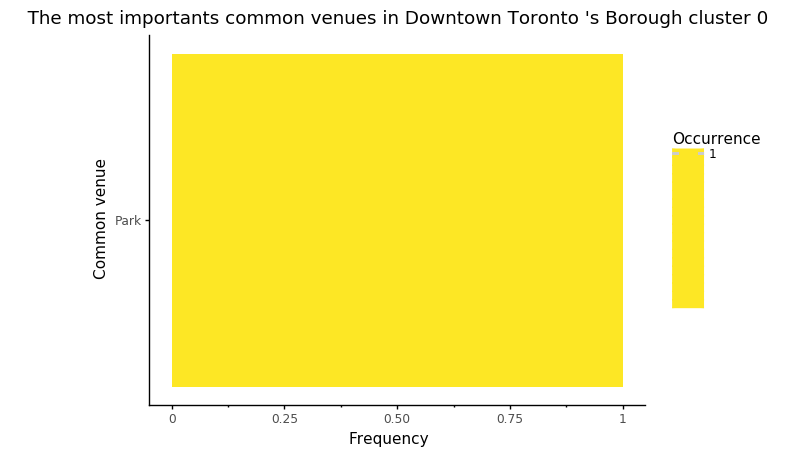

<ggplot: (85693223502)>


C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iamadou\AppData\Local\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/Toronto_Etobicoke_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


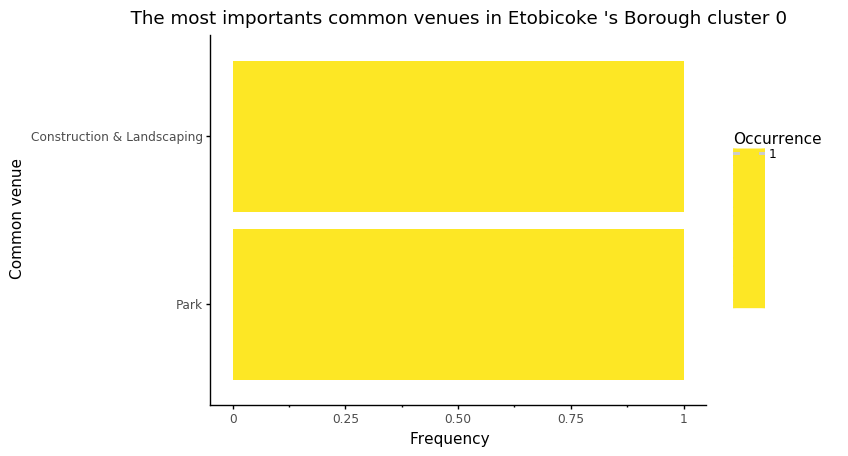

<ggplot: (-9223371951160797745)>


In [56]:
for City_Borough_Cluster in analysis_approach_3["City_Borough_Cluster"].unique():
    df = analysis_approach_3[analysis_approach_3.City_Borough_Cluster==City_Borough_Cluster].sort_values("Occurrence",ascending=False)
    city = df.City.unique()[0]
    cluster = df["Cluster Labels"].unique()[0]
    Borough = df["Borough"].unique()[0]
    indice = df[["City_Borough_Cluster","Common Venue", "Occurrence"]].drop_duplicates().head(20)
    #df = df.drop_duplicates().reset_index(drop=True)
    df = df.merge(indice)
    Venue_cat = pd.Categorical(df['Common Venue'], categories=df['Common Venue'].value_counts().index.tolist())
    df = df.assign(Venue_cat = Venue_cat)
    p = (
    ggplot(df)
    + geom_bar(aes(x='Venue_cat',fill='Occurrence'), show_legend=True,size=2)
    + coord_flip()
    + theme_classic()
    + xlab("Common venue") 
    + ylab("Frequency") 
    + ggtitle("   The most importants common venues in {} 's Borough cluster {}".format(Borough, cluster)))
    file_path = "C:/Users/iamadou/Desktop/Projet ML/Certification IBM data science/Coursera_ML_Capstone_week_4/plots for analysis approach 3/"
    p.save(file_path+ City_Borough_Cluster+'.png')
    print(p)
    

#### This is not important juste another way to plot result

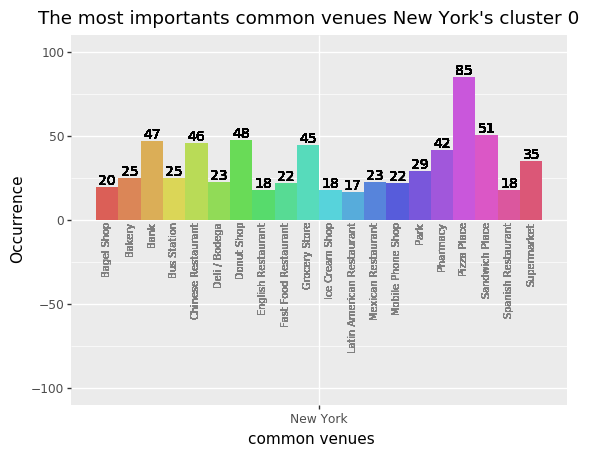

<ggplot: (173808013404)>

In [484]:


data_diagnostique = analysis_approach_1[(analysis_approach_1.City=="New York")&(analysis_approach_1["Cluster Labels"]==0)].sort_values("Occurrence",ascending=False).reset_index(drop=True)
indice = data_diagnostique[["City_Cluster","Common Venue", "Occurrence"]].drop_duplicates().head(20)
data_diagnostique = data_diagnostique.merge(indice)
abs_label = data_diagnostique["Common Venue"].tolist()
abs_label_length = np.max([len(i) for i in abs_label])*4
dodge_text = position_dodge(width=.9)
(ggplot(data_diagnostique, aes(x='City', y='Occurrence', fill='Common Venue'))
 + geom_bar(stat='identity', position='dodge', show_legend=False)
 + geom_text(aes(y=-.5, label='Common Venue'),
             position=dodge_text,
             color='gray', size=7, angle=90, va='top')
 + geom_text(aes(label='Occurrence'),                                    # new
             position=dodge_text,
             size=10, va='bottom', format_string='{}')
 + lims(y=(-abs_label_length, 100))
 + ggtitle("The most importants common venues New York's cluster 0 ")
 + ylab ("Occurrence")
 + xlab("common venues")
)


## <div align="center"> Discussion  </div>

<p style="text-align:justify;">
Through these three analysis approaches, we have highlighted the importance of doing an analysis from different angles: we start from the simplest to the most in-depth. So we are sure to better understand the data, make it speak and generate insights. It must be recognized, I used fairly simplistic approaches combined with kmean clustering which is also quite simple to apply. This is the importance of data science, we start from a complex problem, we decompose it according to several angles of resolution and we choose the one that gives the best results: there is no point in complicating life.
 My approaches were simple but the results are well formulated, very precise and above all answering all questions and all business needs: this is the most important.

<p style="text-align:justify;">
Of course, each data scientist is free to follow the methodology that seems essential to solve his problem, but for my part in this project, I know that I could develop it and improve the result by taking more features from the start such as for example the price of food in restaurants, the monthly turnover or the restaurant score to see which ones are better rated. A quick and simple way to show you that this analysis is limited is to take for example a Neighborhood where we have a lot of restaurants so high frequency, interesting and attractive but if all the restaurants are badly rated then we risk losing a lot of money . Also a Neighborhood can have few restaurants but be far profitable because the restaurants are highly rated and they receive customers of a certain social class because they sell luxury meals.
We can therefore complete the analysis by taking more features which obviously goes with the implementation of new machine learning models.

## <div align="center"> Conclusion  </div>

In this project I showed, through a real case study of clustering that a modeling and machine learning project can bring together three essential steps namely:
 1. preprocessing and data transformation;
 2. Construction of one or more Machine Learning models;
 3. Search for the best hyperparameters

Once these steps are well applied, the optimal model found we go to the deployment phase.
It is an iterative work according to the feedbacks of the different teams and the back testing procedures.
So, it was through a kmean unsupervised machine learning model that I was able to perform a
a discriminating analysis of the coming categories that distinguish each cluster and know the most profitable businesses
in the cities of New York and Toronto with a certain granularity.